#**Titanic Challenge on Kaggle. Machine Learning from Disaster.**
##Первые шаги в анализе данных и машинном обучении.

---


Меня зовут Золотов Роман, я студент 2-го курса СПбГЭТУ "ЛЭТИ" на момент 2025 года. Данной статьей я хочу войти в мир Машинного Обучения и решить первую, основополагающую задачу на сайте Kaggle, а так-же помочь тем, кто собирается заняться тем же.


>[Ссылка на Github автора](https://github.com/neuezeldaa)
>
>[@neuezeldaa](https://t.me/neuezeldaa) Телеграм автора

>[Ссылка на эту же статью на Github](https://github.com/neuezeldaa/TItanic_Kaggle)
>
>По ссылке можно найти Датасеты, использованны в данной статье.
>
>Так-же на Github хранятся Python-файлы с реализацией обучения нейронной сети




---

<a href="https://www.kaggle.com/c/titanic/"> Titanic challenge</a> - Задача с платформы Kaggle. Суть задачи в предугадывании результата с лучшей точностью. Результат в данном случае - это состояние "жизни" пассажира: выжил ли он после крушения или нет.

Предугадывание основывается на анализе данных о других пассажирах. Данные будут состоять из возраста, пола, имени и т.д.

---



##**Теория**


>Перед началом работы хочется добавить небольшую теоретическую часть.

Входных файлов - два: **test.csv** и **train.csv**. О них подробнее рассказано ниже, главное - Датасет **train.csv** содержит информацию о Survived, т.е. выжил ли пассажир или нет (1 или 0).

Наличие данного столбца говорит нам о том, что данная задача имеет тип **Обучения с учителем** (Полагаясь на размеченные данные о выживании, модель будет находить закономерности между остальными признаками пассажиров).

Если рассматривать более глубоко, то подтипом обучения с учителем будет являться **Задача Классификации**. Ответ для каждого пассажира может быть только 0 или 1 (Погиб или выжил).

>Если бы столбца **survived** небыло, то модель бы **Обучалась без учителя**, проводила кластеризацию (искала похожих пассажиров), определяла, какие признаки связаны друг с другом и тд.

Итог:

| Критерий                          | Ответ                  |
|-----------------------------------|------------------------|
| 1. Наличие размеченных данных     | Да, 'Survived'         |     
| 2. Цели модели                    | Предсказание выживания |
| 3. Задача                         | Классификация          |
| 4. Тип задачи                     | Обучение с учителем    |


---

План действий таков:

>1.   Подключение нужных библиотек
>2.   Загрузка данных
>3.   Первичный анализ
>4.   Выбор признаков
>5.   Обучение модели
>6.   Валидация модели (Примерная точность)

В файле google colab используется только один язык программирования - Python.

---

##**Подключение библиотек**

---

Основные библиотеки, участвующие во всем процессе обучения:
>* **Pandas** для работы с данными в табличной форме
>
>* **Matplotlib** и **seaborn** для визуализации данных
>
>* **Numpy** для работы с линейной алгеброй (вычисление многомерных массивов)
>
>* **sklearn** для Машинного Обучения и Прогнозирования

In [1]:
import warnings #Игнорируем предупреждения, чтоб код воспринимался приятнее
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd # Импорт библиотеки Pandas

from matplotlib import pyplot as plt # Импорт библиотеки matplotlib
import numpy as np # Импорт библиотеки numpy

import seaborn as sns # Импорт библиотеки seaborn

import pylab as plot # Импорт библиотеки pylab для настройки стилей графиков

params = { # Параметры для графиков
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]

}
plot.rcParams.update(params)

---

##**Загрузка данных**

---


В этом пункте импортируем входные данные: два .csv файла.

**train.csv** и **test.csv** - Датасеты

Dataset - уже обработанная структурированная информация, чаще представленная в виде таблиц.

>Оба файла являются CSV, представлениями табличных данных

>Содержат информацию об:
* PassengerID: ID Пассажира
* Pclass: Класс на борту (Первый, второй или третий класс)
* Name: Имя
* Sex: Пол
* Age: Возраст
* SibSp: Количество Братьев/Сестер/Супруг на борту
* Parch: Количество Родителей/Детей на борту
* Ticket: Номер Билета
* Fare: Стомость билета
* Cabin: Номер каюты
* Embarked: Три возможных Порта отправления (S - Southampton, C - Cherbourg, Q - Queenstown)

В **train.csv** информация об 891 (от 1-го PassengerID до 891-го PassengerID) пассажире. В **test.csv** 418 (от 892-го PassengerID до 1309-го PassengerID) пассажиров.

>Единственное различие между файлами заключается в том, что в **train.csv**, в отличии от **test.csv**, обозначен еще один столбик - Survived: Информация о том, выжил ли пассажир при крушении (0 - если нет, 1 - если да).

Наша задача: Для пассажиров из файла **test.csv** предугадать, выжили бы они или нет при крушении корабля.

***
Начинаем подключать первый Датасет.

In [2]:
data = pd.read_csv('train.csv') # В объект data помещается таблица train.csv

print(data.shape) # Количество строк и столбцов в data

(891, 12)


891 - Количество пассажиров.

12 - Количество столбцов с информацией о пассажире (от PassengerID до Embarked, включая столбец Survived).





In [3]:
data.head(7) # Предварительный просмотр данных из таблицы о первых 7-ми пассажирах (число 7 выбрано случайно, не несет никакой информации)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


---

## **Первичный анализ**

---

Если быстрым взглядом осмотреть таблицу, то можно увидеть NaN в Age и Cabin. Это значит, что данная информация о пользователе отсутствует.

Для быстрого просмотра статистики по числовым столбцам можно использовать метод describe().  

>В методе describe() выводится:
* count: Количество заполненых ячеек (Не Nan)
* mean: Среднее значение
* std: Стандартное отклонение
* min: Минимальное значение
* 25%: 25% данных меньше или равно этому значению
* 50%: Медиана (середина данных)
* 75%: 75% данных меньше или равно этому значению
* max: Максимальное значение

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Примерно 20% от возрастов пассажиров и правда было потярено.

Для того, чтобы восстановить потерянную информацию о возрасте, можно обратить внимание на **Титулы** возле имени у каждого из пассажиров! (Mr, Mrs, Miss..). Пассажирам, чей возраст был утерян, можно присвоить медианное значение возраста для их титула.

Сначала хочу выделить титулы пассажиров в отдельный столбец

In [5]:
# Извлекаем титул с помощью регулярного выражения
data['Title'] = data['Name'].str.extract(r',\s*([A-Za-z]+)\.', expand=False)

# Посмотрим, какие титулы получились
print(data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Mme           1
Ms            1
Sir           1
Lady          1
Capt          1
Jonkheer      1
Name: count, dtype: int64


Для наглядности можем посмотреть на зависимости возраста от титула на графике

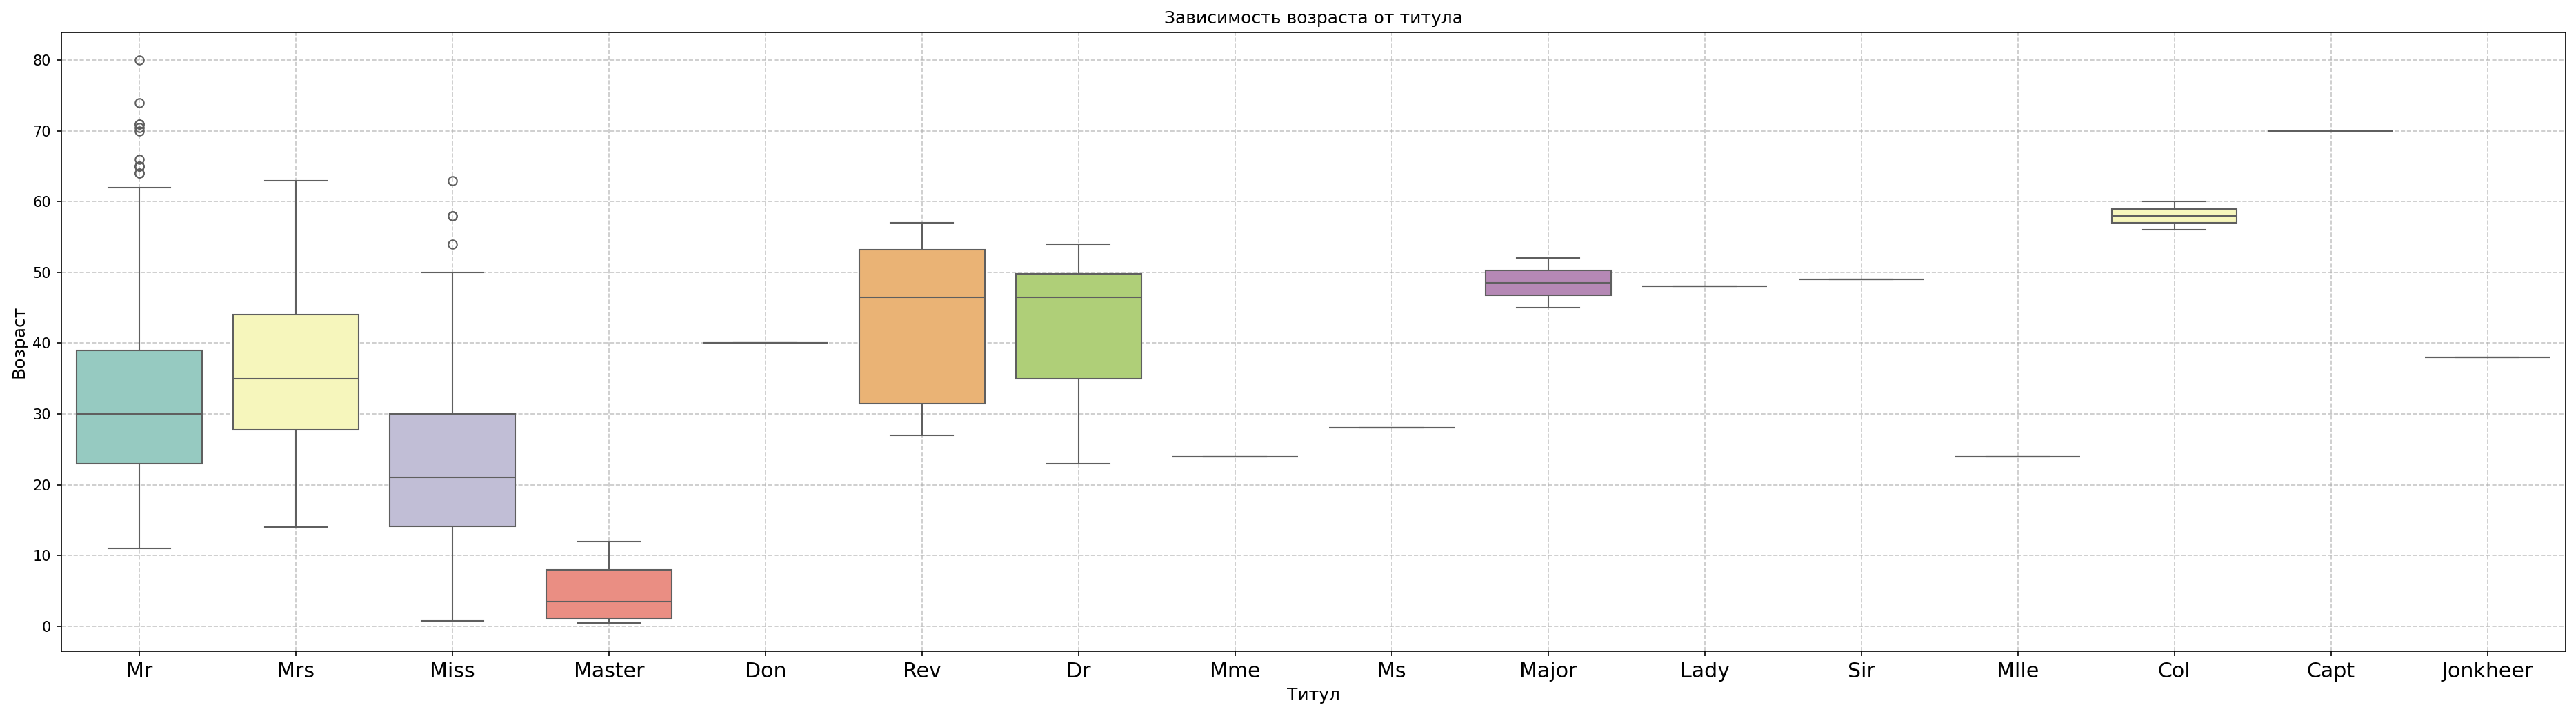

In [6]:
sns.boxplot(x='Title',
            y='Age',
            data=data.dropna(subset=['Age']),
            palette='Set3')

plt.title('Зависимость возраста от титула')
plt.xlabel('Титул')
plt.ylabel('Возраст')
plt.xticks(rotation = 0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
title_age_median = data.groupby('Title')['Age'].median() # Для каждого титула ищем медианное значение возраста

def fill_age(line): # Функция для заполнения NaN медианой по титулу
    if pd.isna(line['Age']): # Если ячейка с возрастом у строки пустая, то..
        return title_age_median[line['Title']] # Возвращаем в ячейку медианное значение возраста для титула у пассажира
    else:
        return line['Age'] # Иначе возвращаем эту же ячейку

# Применяем функцию к столбцу Age
data['Age'] = data.apply(fill_age, axis=1)

Пропущенные значения возрастов были восполнены медианным значением титула пассажира!

Затронем пропущенные значения в столбце Cabin. Можем использовать методы isna() для проверки каждой ячейки на NaN и sum() для подсчета подходящих (пустых) ячеек.

In [8]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Мы так-же видим, что в столбце Cabin с каютами пассажиров пропущено 687 из 891 значения. Из-за того, что около 80% данных потеряны. В таком случае единственная информация для анализа, которую мы можем извлечь из этого столбика - это наличие самой информации о каюте.


Можно заметить 2 пустые ячейки в строке Embarked (неизвестно с какого порта садились эти двое пассажиров).

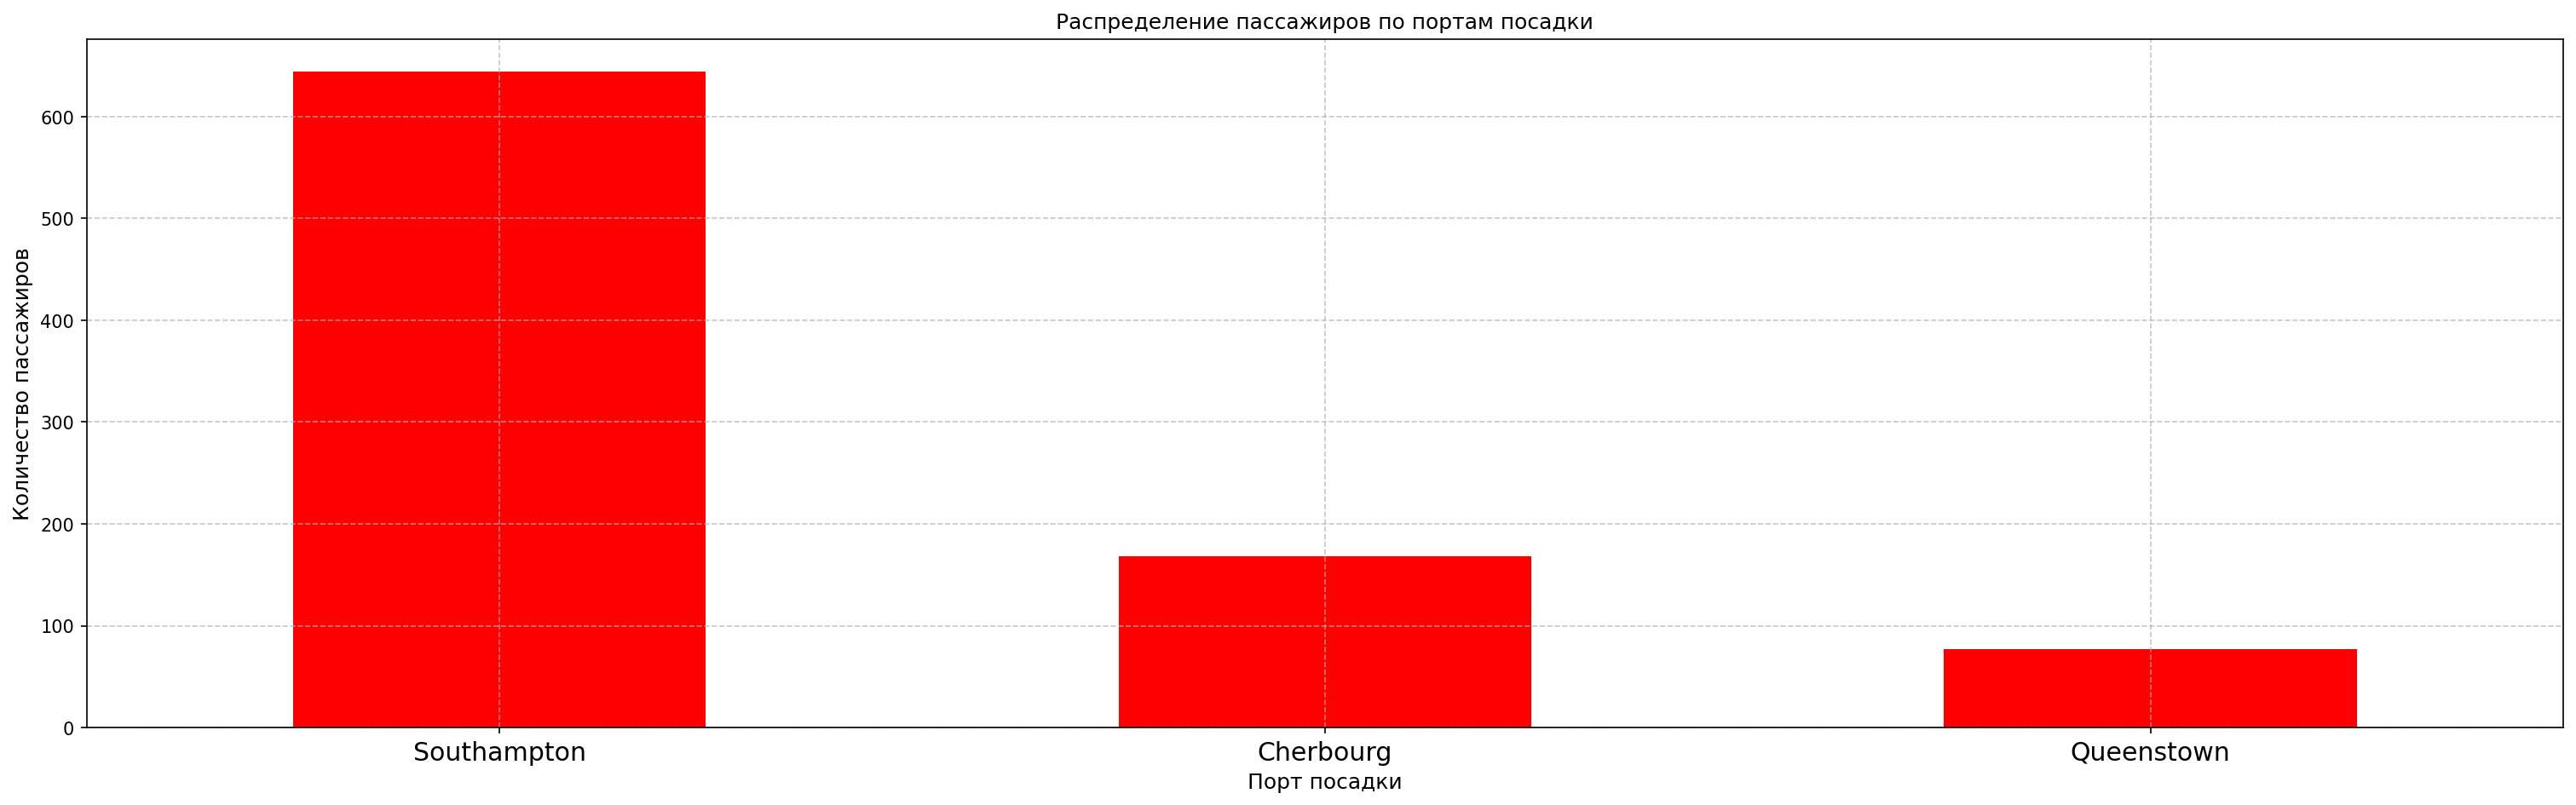

In [9]:
data['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}).value_counts().plot(kind='bar', color='red')
# Метод value_counts() считает сколько раз встречается S, C, Q соответственно. Метод plot() строит столбчатую диаграмму (bar plot) на основе полученных значений
plt.title('Распределение пассажиров по портам посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Из гистограммы видно, что посадки в Southampton'е сильно преобладают по количеству над количеством посадок в остальных портах. Для двух неизвестных ячеек посадки присвоим наиболее вероятный случай посадки - Порт S.

In [10]:
for i, emb in enumerate(data['Embarked']): # Метод enumerate позволяет переменной i присваивать индекс объекта строки, а в emb - сам объект.
# В данном случае emb - это значение ячейки в столбце Embarked
    if pd.isna(emb): data['Embarked'][i] = 'S' # Если emb является NaN, то этой ячейке присваивается порт S

In [11]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Видим, что пустых ячеек в столбце Embarked больше нет.

---

##**Выбор признаков**

---

###**Пол пассажира**

Первым делом хочется рассмотреть варианты, которые, вероятнее всего, максимально будут влиять на выжимаемость - это Пол, Статус, Возраст и Класс пассажира. Начнем по порядку.

Построим диаграмму.

In [12]:
# Метод crosstab строит новую таблицу, основываясь на "пересечениях" столбцов
# В данном случае строим таблицу из четырех элементов: сколько женщин погибло/выжило, сколько мужчин погибло/выжило
survival_by_sex = pd.crosstab(data['Sex'], data['Survived'])

survival_by_sex.head()

Survived,0,1
Sex,,
female,81,233
male,468,109


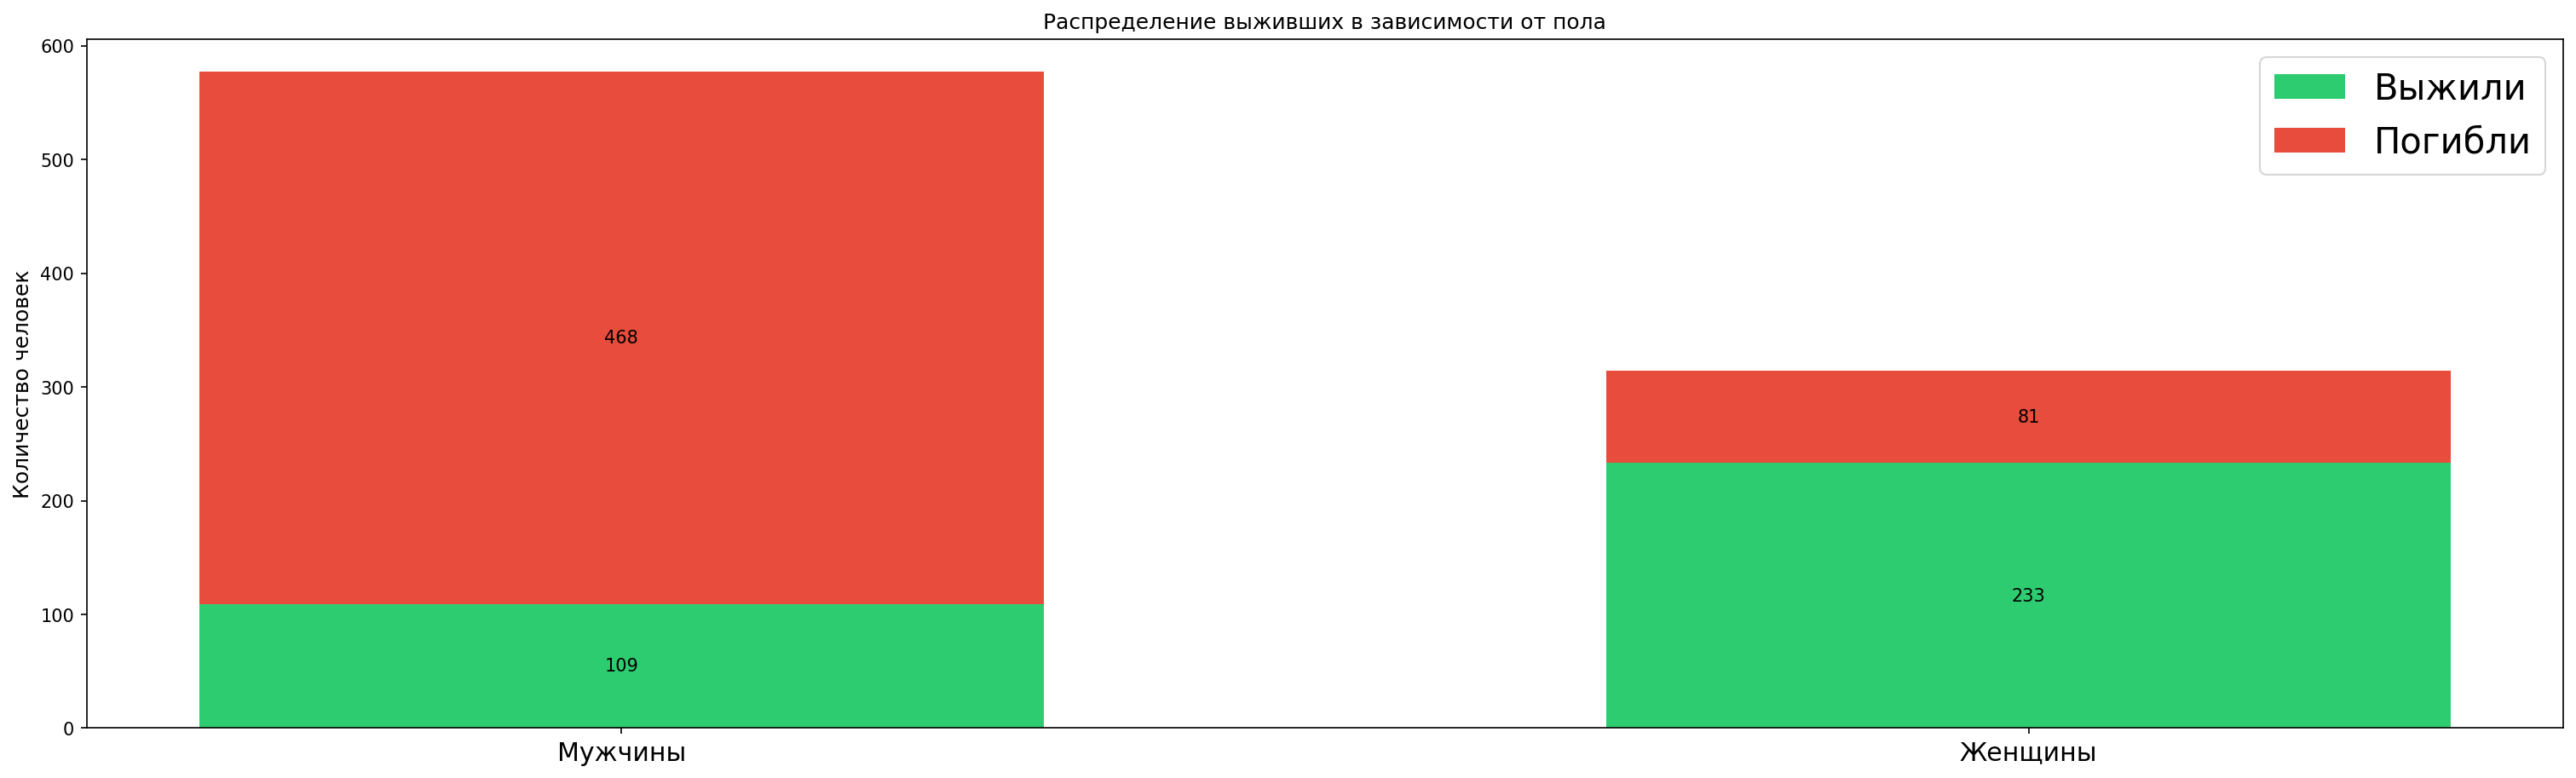

In [13]:
males_total = survival_by_sex.loc['male'].sum() # Сколько всего мужчин
females_total = survival_by_sex.loc['female'].sum() # Сколько всего женщин

males_survived = survival_by_sex.loc['male', 1] # Сколько мужчин выжило
females_survived = survival_by_sex.loc['female', 1] # Сколько женщин выжило

# Создаем словарь для построения столбчатого графика
survivors_counts = {
    'Выжили': [males_survived, females_survived], # Выжили: [109, 233]
    'Погибли': [survival_by_sex.loc['male', 0], survival_by_sex.loc['female', 0]] # Погибли: [468, 81]
}


fig, xy = plt.subplots() # Создает "картину" fig и график xy
bottom = np.zeros(2) # Массив нулей для построения "стопочных" столбцов (со слоями "выжили" и "погибли")

colors = ['#2ecc71', '#e74c3c'] # Зеленый - выжили, Красный - Погибли
for i, (key, count) in enumerate(survivors_counts.items()): # Проходимся по словарю, сначала выжившие, потом погибшие
    p = xy.bar(('Мужчины', 'Женщины'), # Метод bar создает две столбчатые диаграммы "Мужчины" и "Женщины"
               count, # Высота столбцов
               width=0.6, # Ширина столбцов
               label=key, # Подпись для легенды "Выжили" или "Погибли"
               bottom=bottom, # Высота для текущего слоя
               color=colors[i]) # Цвет столбцов
    bottom += count # Следующий столбец начнется с конца предыдущего (Первые два столбца высотой от 0 до 109 и 233, вторые два столбца высотой от 109 и 233 до 468 и 81)
    xy.bar_label(p, label_type='center') # Добавляет числа в центр столбца


xy.set_title('Распределение выживших в зависимости от пола') # Устанавливаем имя графика
xy.set_ylabel('Количество человек') # Подписываем ось У
xy.legend() # Отображаем на графике легенду "Выжили/Погибли"
plt.show() # Отображаем на экране получившийся график

В процентном соотношении:

In [14]:
print(f'''Выжило мужчин: {round(males_survived*100/males_total, 2)}%
Выжило женщин: {round(females_survived*100/females_total, 2)}%
''')

Выжило мужчин: 18.89%
Выжило женщин: 74.2%



Основываясь на выживаемость по признаку "Пол" пассажира, можно сделать временный вывод, что женщины выживали сильно чаще мужчин. (Возможно, это связано с приказом в первую очередь спасать женщин и детей с борта во время крушения)

###**Статус или Титул Пассажира**

Рассмотрим Статус пассажира, а именно то, как титул влияет на выживаемость.

В Датасете присутствует большое количество титулов, которые упоминаются единожды. Для обобщения я использую словарь с "Синонимами" к титулам, т.е заменю редкий титул на его более популярный синоним. Например: Титул **Дон** перейдет в Титул **Мистер** и тд.

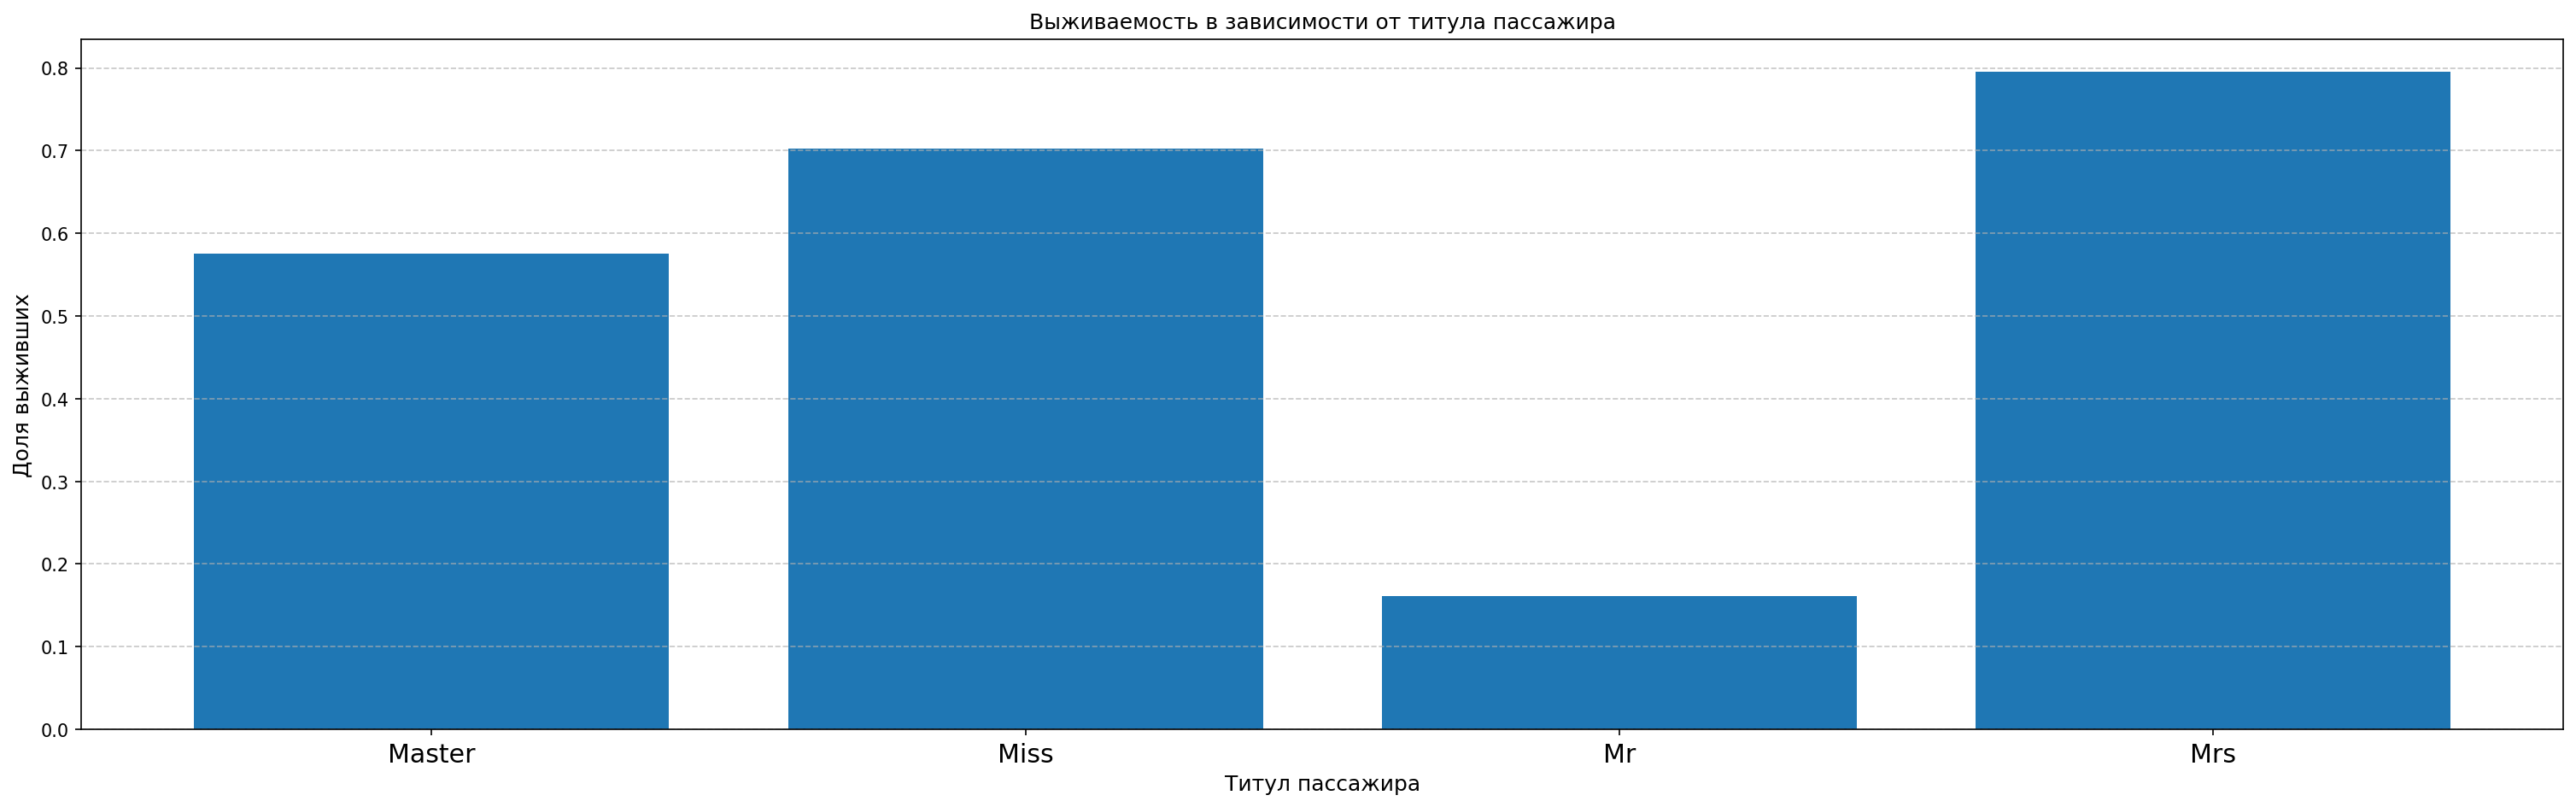

In [15]:
# Словарь с синонимами
titles = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Dr": "Mr",
    "Rev": "Mr",
    "Mlle": "Miss",
    "Mme": "Mrs",
    "Ms": "Miss",
    "Major": "Mr",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "Col": "Mr",
    "Capt": "Mr",
    "Don": "Mr",
    "Sir": "Mr",
    "Jonkheer": "Mr",
    "Dona": "Mrs"
}

# Заменяем титулы в Датасете на синонимичные
data['Title'] = data['Title'].map(titles)

# Расчёт доли выживших
title_survival = data.groupby('Title')['Survived'].mean().reset_index()

plt.bar(title_survival['Title'], title_survival['Survived'])
plt.xlabel('Титул пассажира')
plt.ylabel('Доля выживших')
plt.title('Выживаемость в зависимости от титула пассажира')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Теория о том, что в первую очередь спасали женщин (мисс и миссис) и детей (мастера) из предыдущего пункта подтверждается.

###Возраст пассажира

Посмотрим на то, как возраст пассажира влияет на его выживаемость.

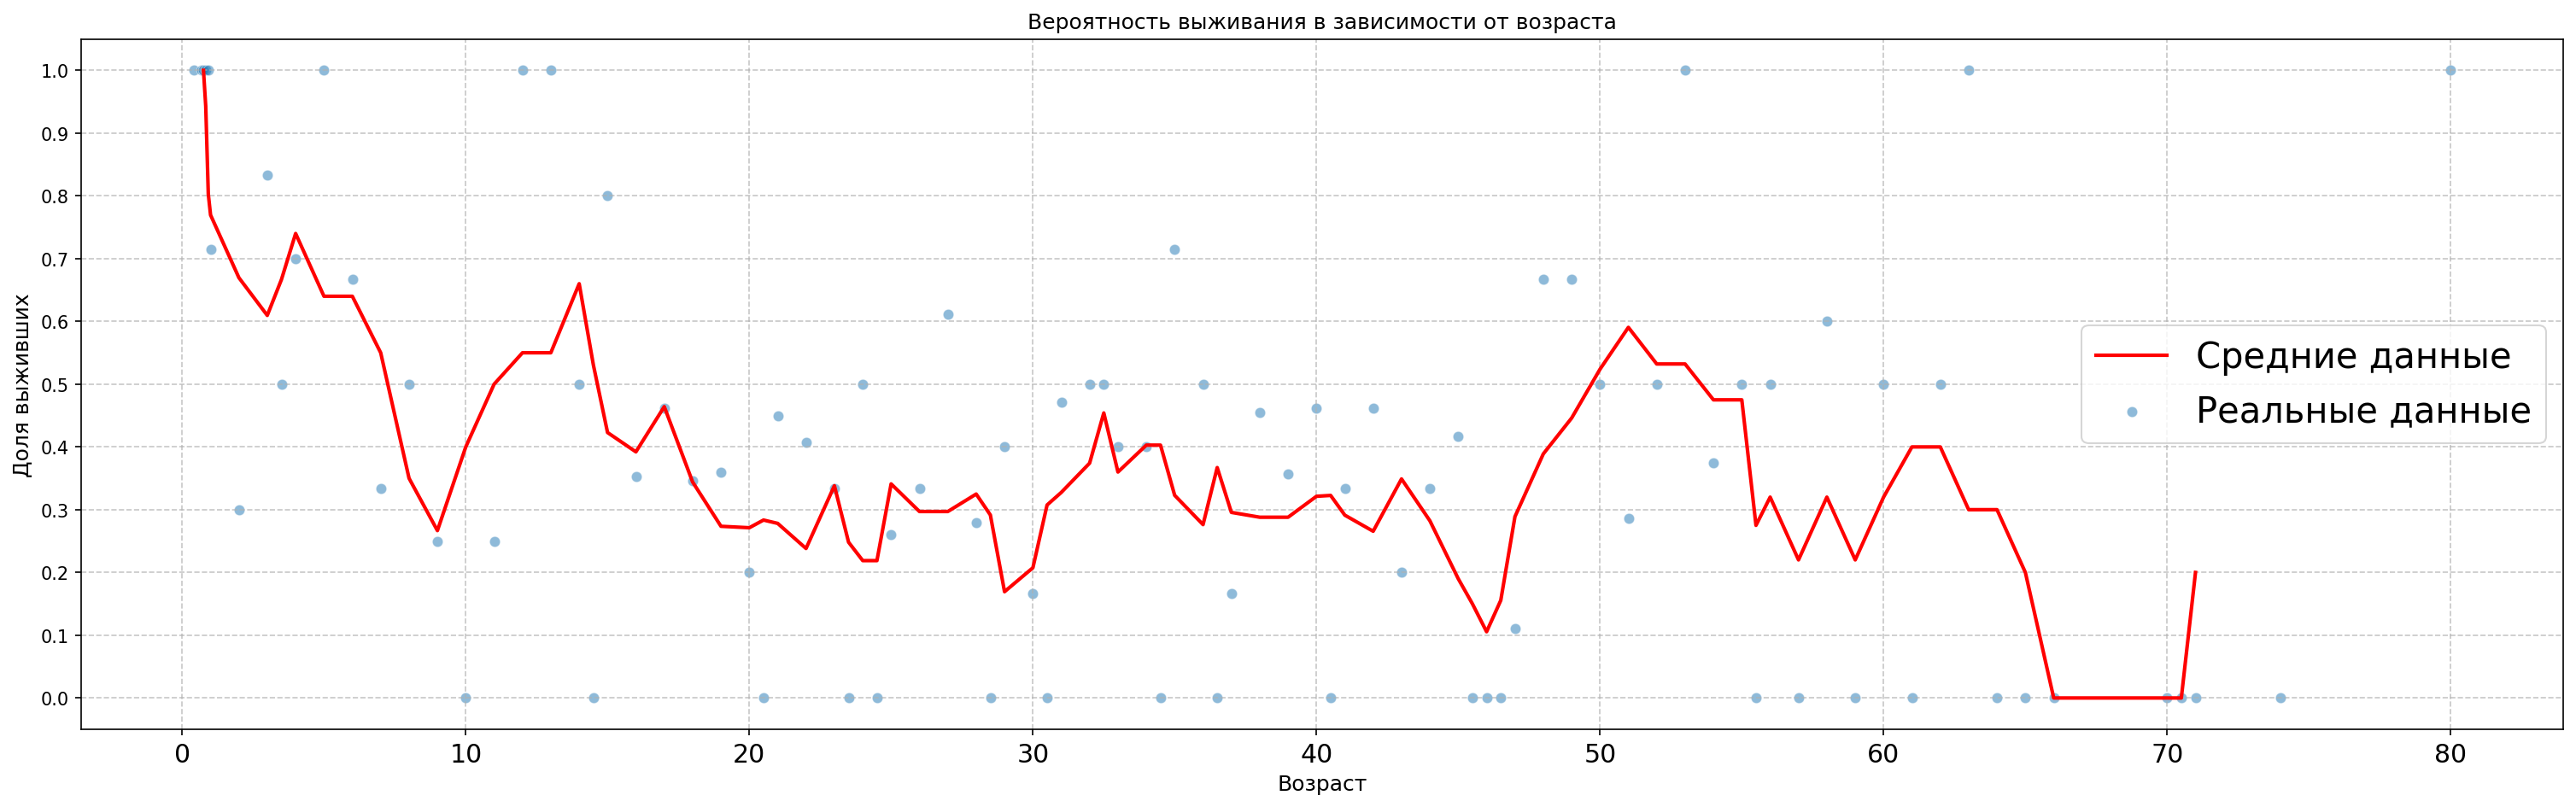

In [16]:
age_survival = data.groupby('Age')['Survived'].mean().reset_index() # Считаем вероятность выжить в среднем для каждого возраста

age_survival['Rolling_Mean'] = age_survival['Survived'].rolling(window=5, center=True).mean()
# Сглаживаем шумы и локальные выбросы
plt.plot(age_survival['Age'],
         age_survival['Rolling_Mean'],
         color='red',
         linewidth=2,
         label='Средние данные')
# Красная линия на графике показывает среднее значение между пятью ближайшими точками для избежания выбросов

# Настройки графика
sns.scatterplot(x='Age',
                y='Survived',
                data=age_survival,
                alpha=0.5,
                label='Реальные данные')
# Синие точки на графике показывают реальную долю выживших для данного возраста
plt.title('Вероятность выживания в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

В очередной раз видим более высокий уровень выживаемости среди детей относительно пассажиров всех возрастов, что в очередной раз доказывает нашу теорию. С увеличением возраста выживаемость пассажиров падает из-за ограниченной мобильности.

###**Класс пассажира**

Последний из, как мне кажется, значимых для обучения признаков - это класс каюты пассажира

In [17]:
#Создаем словарь с классами
class_names = {1: 'Первый класс', 2: 'Второй класс', 3: 'Третий класс'}
# Создаем новый столбец с текстовым названием классов вместо чисел
data['Class'] = data['Pclass'].map(class_names)

#Следующие две строчки помогают упорядочить классы по порядку
ordered_classes = ['Первый класс', 'Второй класс', 'Третий класс']
data['Class'] = pd.Categorical(data['Class'],
                               categories=ordered_classes,
                               ordered=True)

# Формируем таблицу с выжившими о погибшими для каждого класса
grouped = data.groupby(['Class', 'Survived']).size().unstack(fill_value=0)
grouped.columns = ['Погибли', 'Выжили']

grouped.head()

,Погибли,Выжили
Class,,
Первый класс,80,136
Второй класс,97,87
Третий класс,372,119


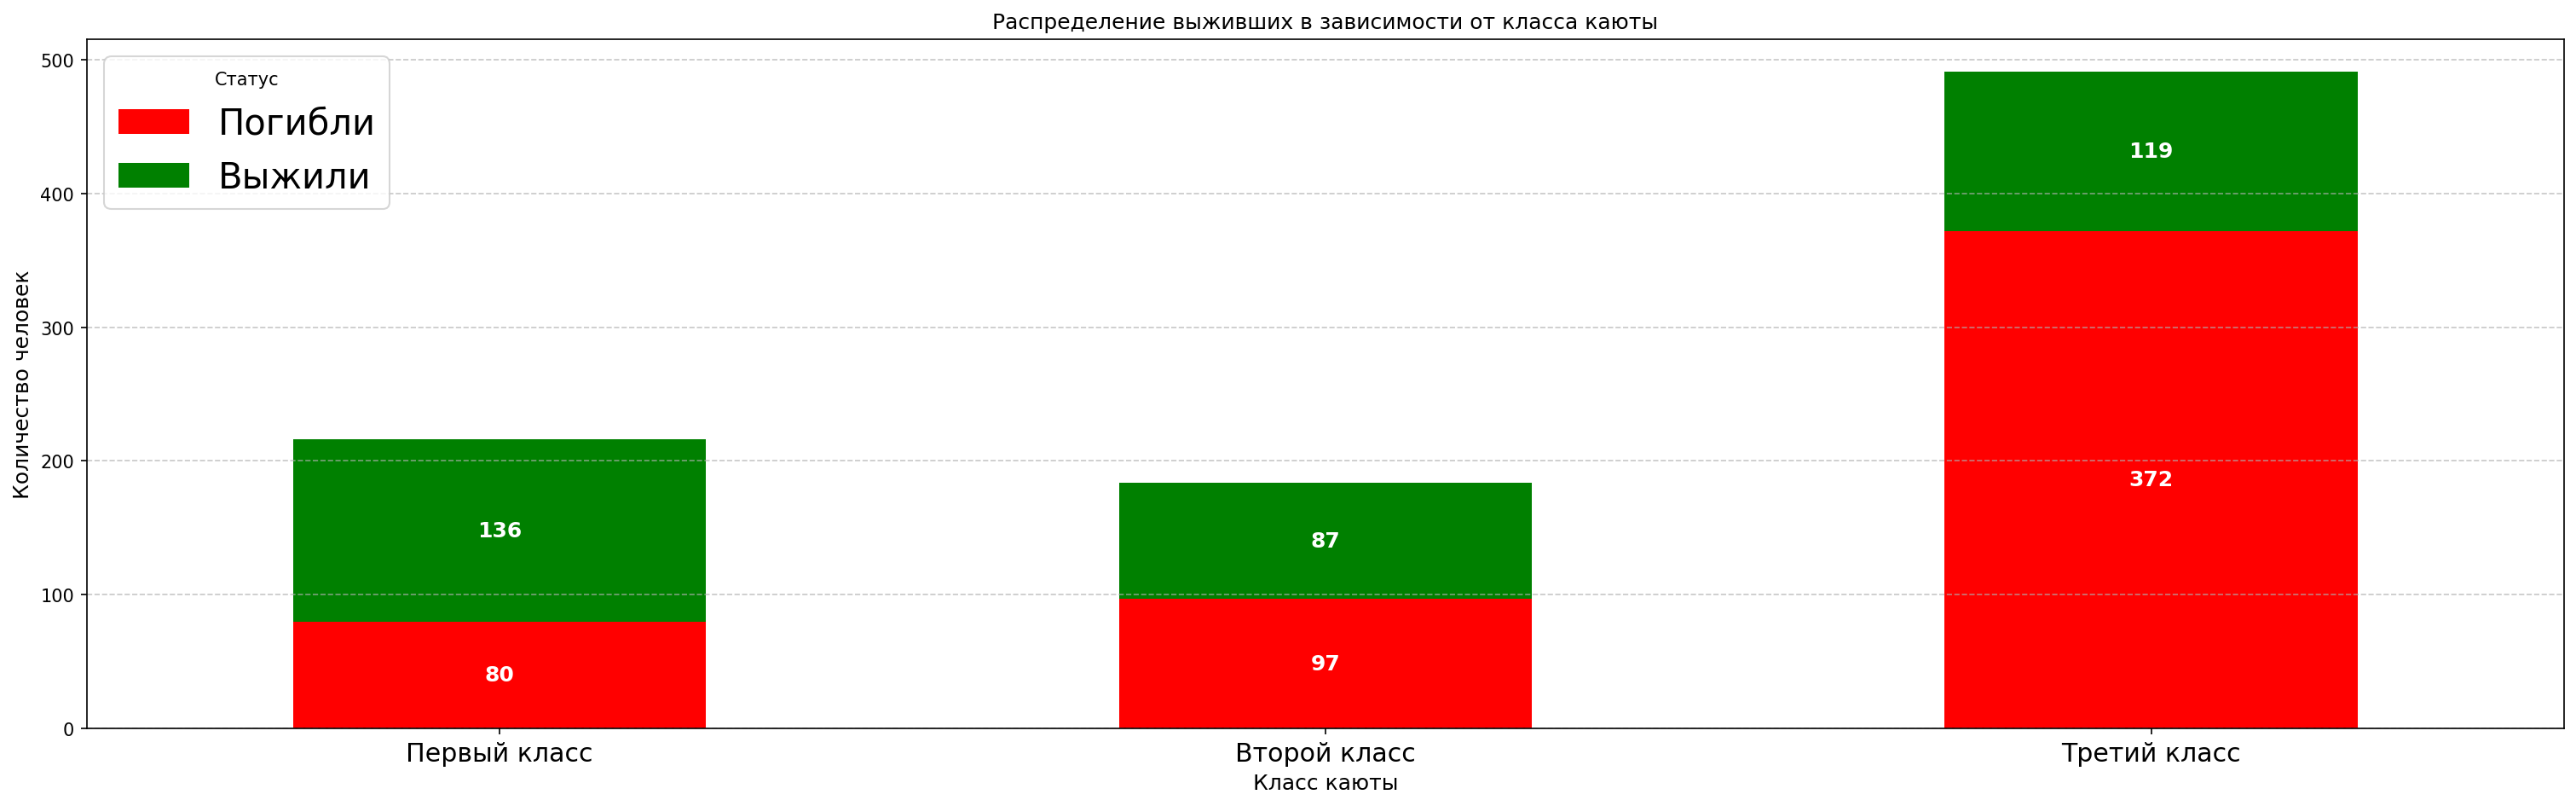

In [18]:
# Визуализация
ax = grouped.plot.bar(stacked=True, color=['r', 'g'])

# Добавляем подписи в центр каждого сегмента
for container in ax.containers:
    ax.bar_label(container,
                 label_type='center',
                 color='white',
                 fontsize=12,
                 weight='bold')

# Настройки графика
plt.title('Распределение выживших в зависимости от класса каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Количество человек')
plt.xticks(rotation=0)
plt.legend(title='Статус')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

В процентном соотношении для каждого класса:

In [19]:
# Считаем общее количество людей в каждом классе
total_by_class = grouped.sum(axis=1)

# Считаем проценты
survival_percent = (grouped['Выжили'] / total_by_class) * 100
death_percent = (grouped['Погибли'] / total_by_class) * 100

percent_table = pd.DataFrame({
    'Выжили (%)': survival_percent,
    'Погибли (%)': death_percent
})

percent_table.head()

,Выжили (%),Погибли (%)
Class,,
Первый класс,62.962963,37.037037
Второй класс,47.282609,52.717391
Третий класс,24.236253,75.763747


###Родственники пассажиров на борту

Теперь перейдем к пункту из признаков, которые, по мнению автора, не так сильно влияют на выживаемость, как предыдущие проанализированные (Возраст, титул..). В число таковых признаков будут входить: Родственники на борту, Номер кабины, Порт отправки и стоимость билета.

Сейчас будет рассмотрена корреляция между выживаемостью и наличием родственников на борту. Начнем.

Рассмотрим то, как каждый признак SibSp и Parch отдельно влияет на выживаемость, как они вместе влияют и то, как Поездка в Одиночку влияет. Для этого построим таблицу корреляций.

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Третий класс
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Первый класс
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Третий класс
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Первый класс
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Третий класс


Просто напоминание о том, как сейчас выглядит наш Датасет.

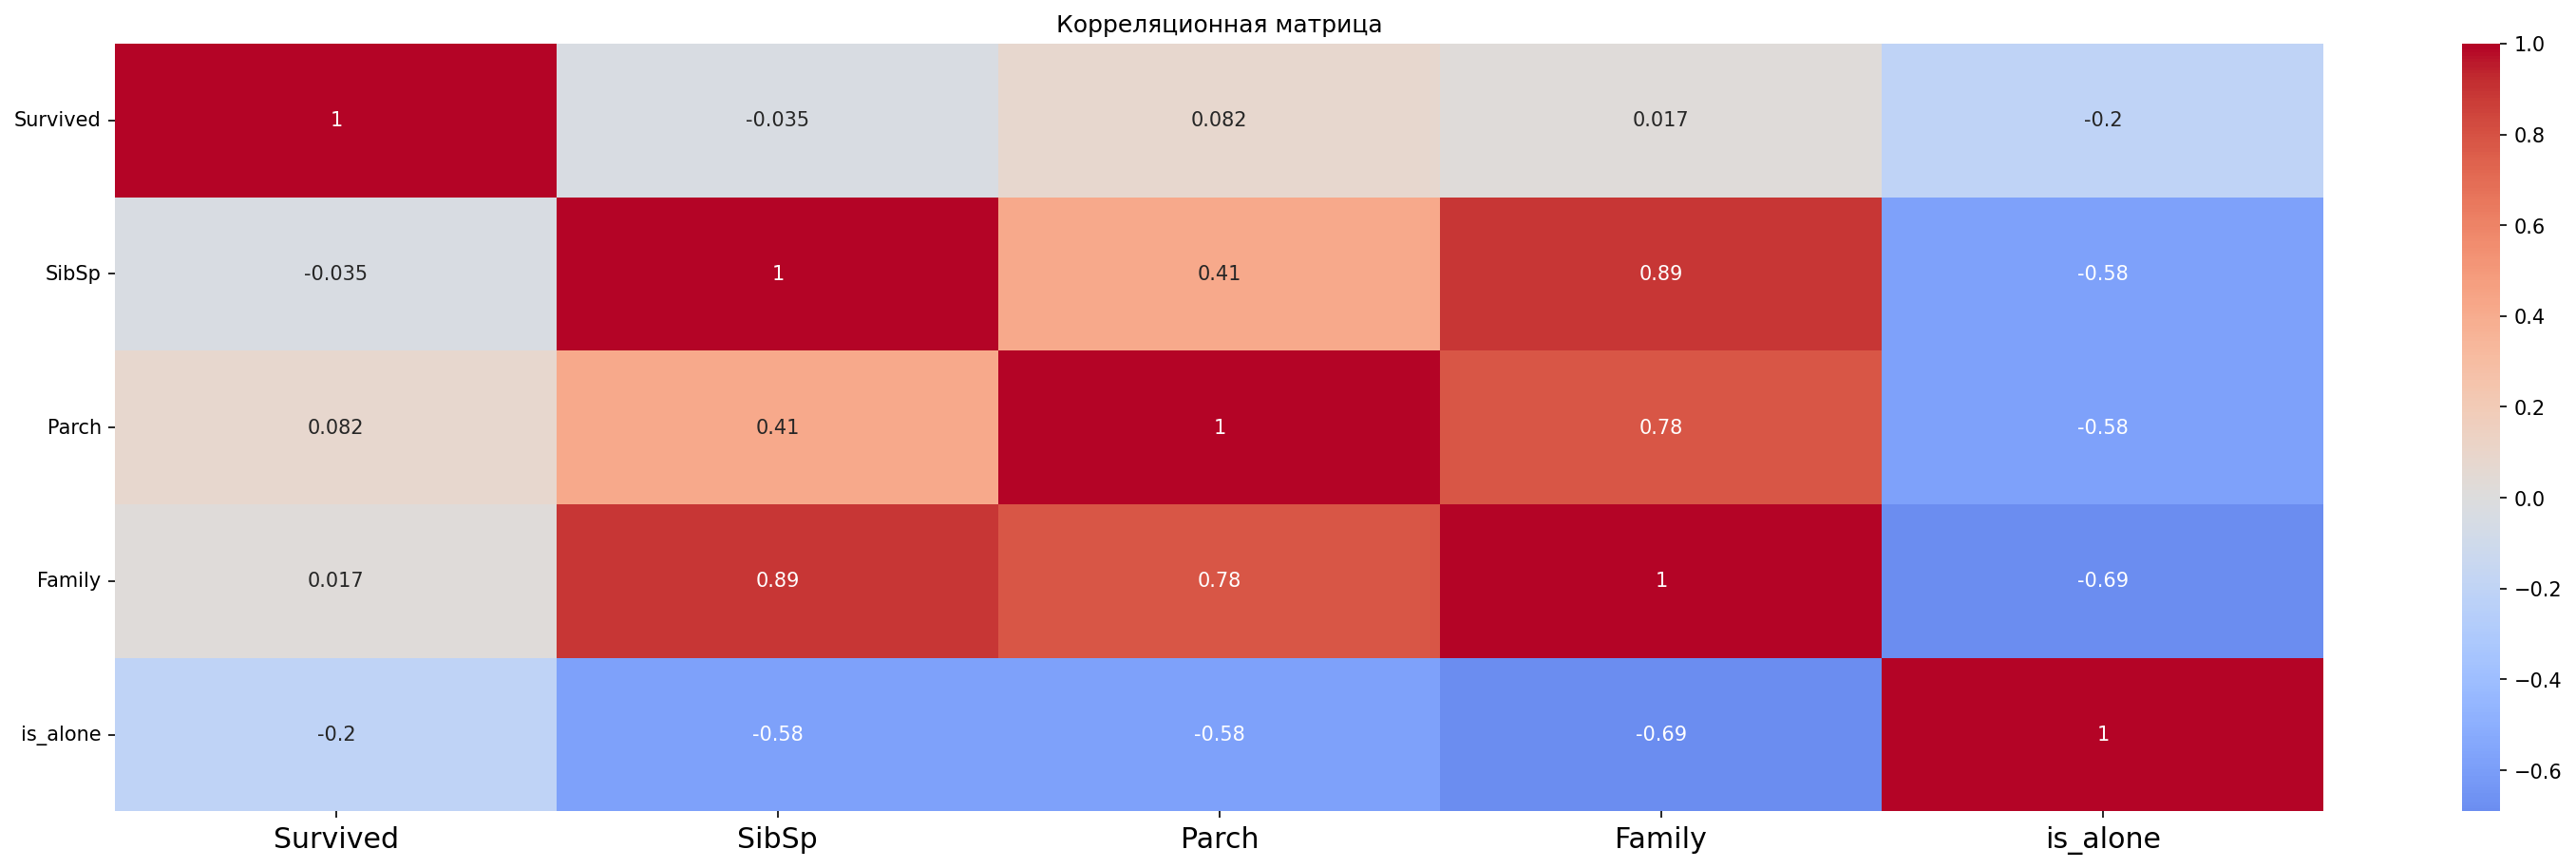

In [21]:
# Создание новых признаков
#Family - совокупность братьев/сестер и родителей/детей
data['Family'] = data['SibSp'] + data['Parch']
#Если пассажир едет в одиночку - 1, иначе 0
data['is_alone'] = (data['Family'] == 0).astype(int)

# Выбор интересующих колонок
cols = ['Survived', 'SibSp', 'Parch', 'Family', 'is_alone']

# Корреляционная матрица
correlation_matrix = data[cols].corr()
# Метод .corr() вычисляет коэф. корреляции Пирсона


# Визуализация
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

Если вы хотите изучить тему Коэффициентов корреляции Пирсона поблиэе, то можете изучить данную статью:
[Коэффициент корреляции Пирсона](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%9F%D0%B8%D1%80%D1%81%D0%BE%D0%BD%D0%B0)

>Чем ближе к 1, тем сильнее положительная связь между признаками
>
>Чем ближе к 0, тем сильнее отсутствии связи вовсе
>
>Чем блжие к -1, тем сильнее отрицательная связь между признаками

Из матрицы корреляций можно сделать выводы, что:


*   Отсутствие семьи на борту более негативно сказывалось на выживаемости, чем ее наличие (Хотя и тот, и другой признак имели достаточно слабую корреляцию к выживаемости)

Пояснение:
>Family - Survive 0.017 (Почти никак семья не влияла на выживаемость)
>
>is_alone - Survive -0.2 (Одиночество слабо влияло на выживаемость в отрицательную сторону)

Возможно, стоит рассмотреть влияение количества людей в семье на выживаемость, для этого построим гистограммы.

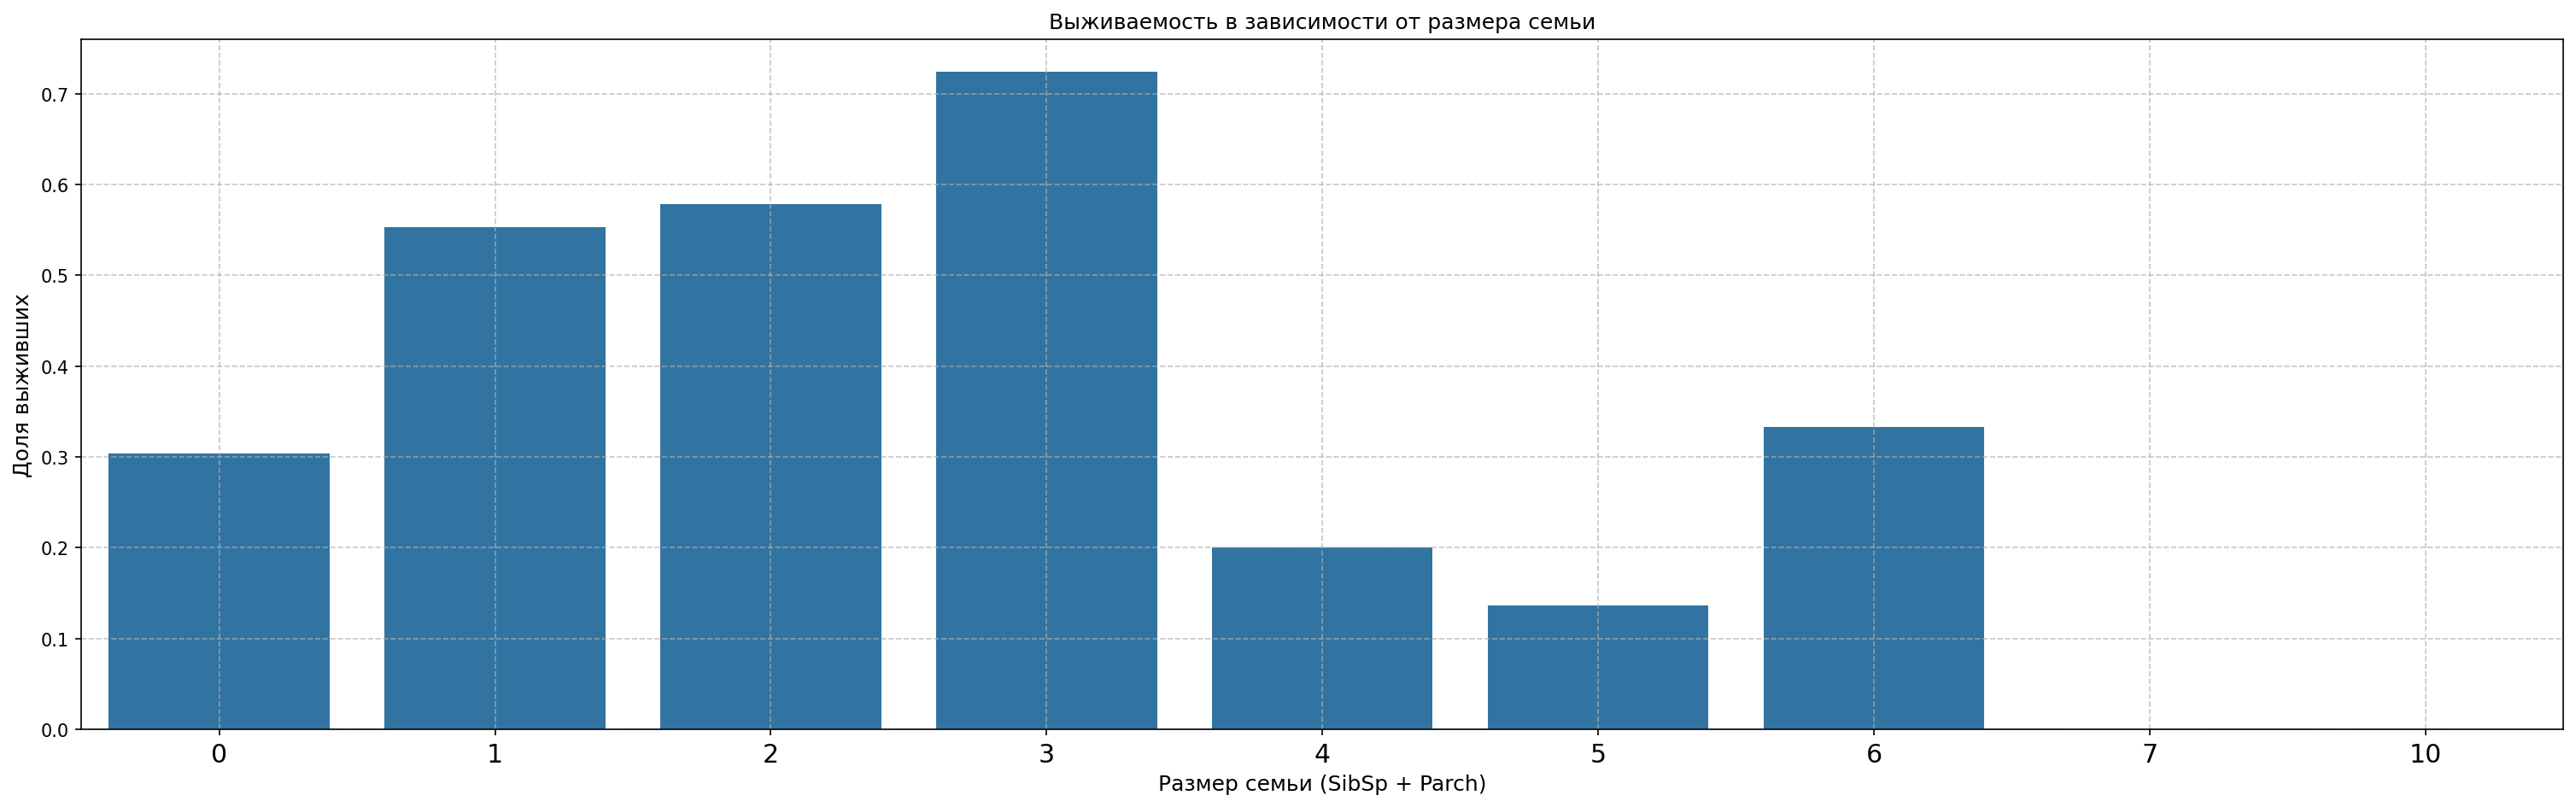

In [22]:
sns.barplot(x='Family', y='Survived', data=data, ci=None)
plt.title('Выживаемость в зависимости от размера семьи')
plt.xlabel('Размер семьи (SibSp + Parch)')
plt.ylabel('Доля выживших')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Как мы видим, лучшая выживаемость у тех пассажиров, кто путешествовал в компании с одним, двумя или даже тремя членами семьи. Одинокие люди имели более низкие шансы выжить, а наличие семьи в 4-6 человек уже создавало серьезные проблемы для выживания.

###**Номер Каюты пассажира**

Достаточно взглянуть на наш Датасет и вспомнить, что нам известно всего 20% кают пассажиров, из-за этого многие детали упускаются. НО, мы можем оценить само по себе наличие информации о каюте.

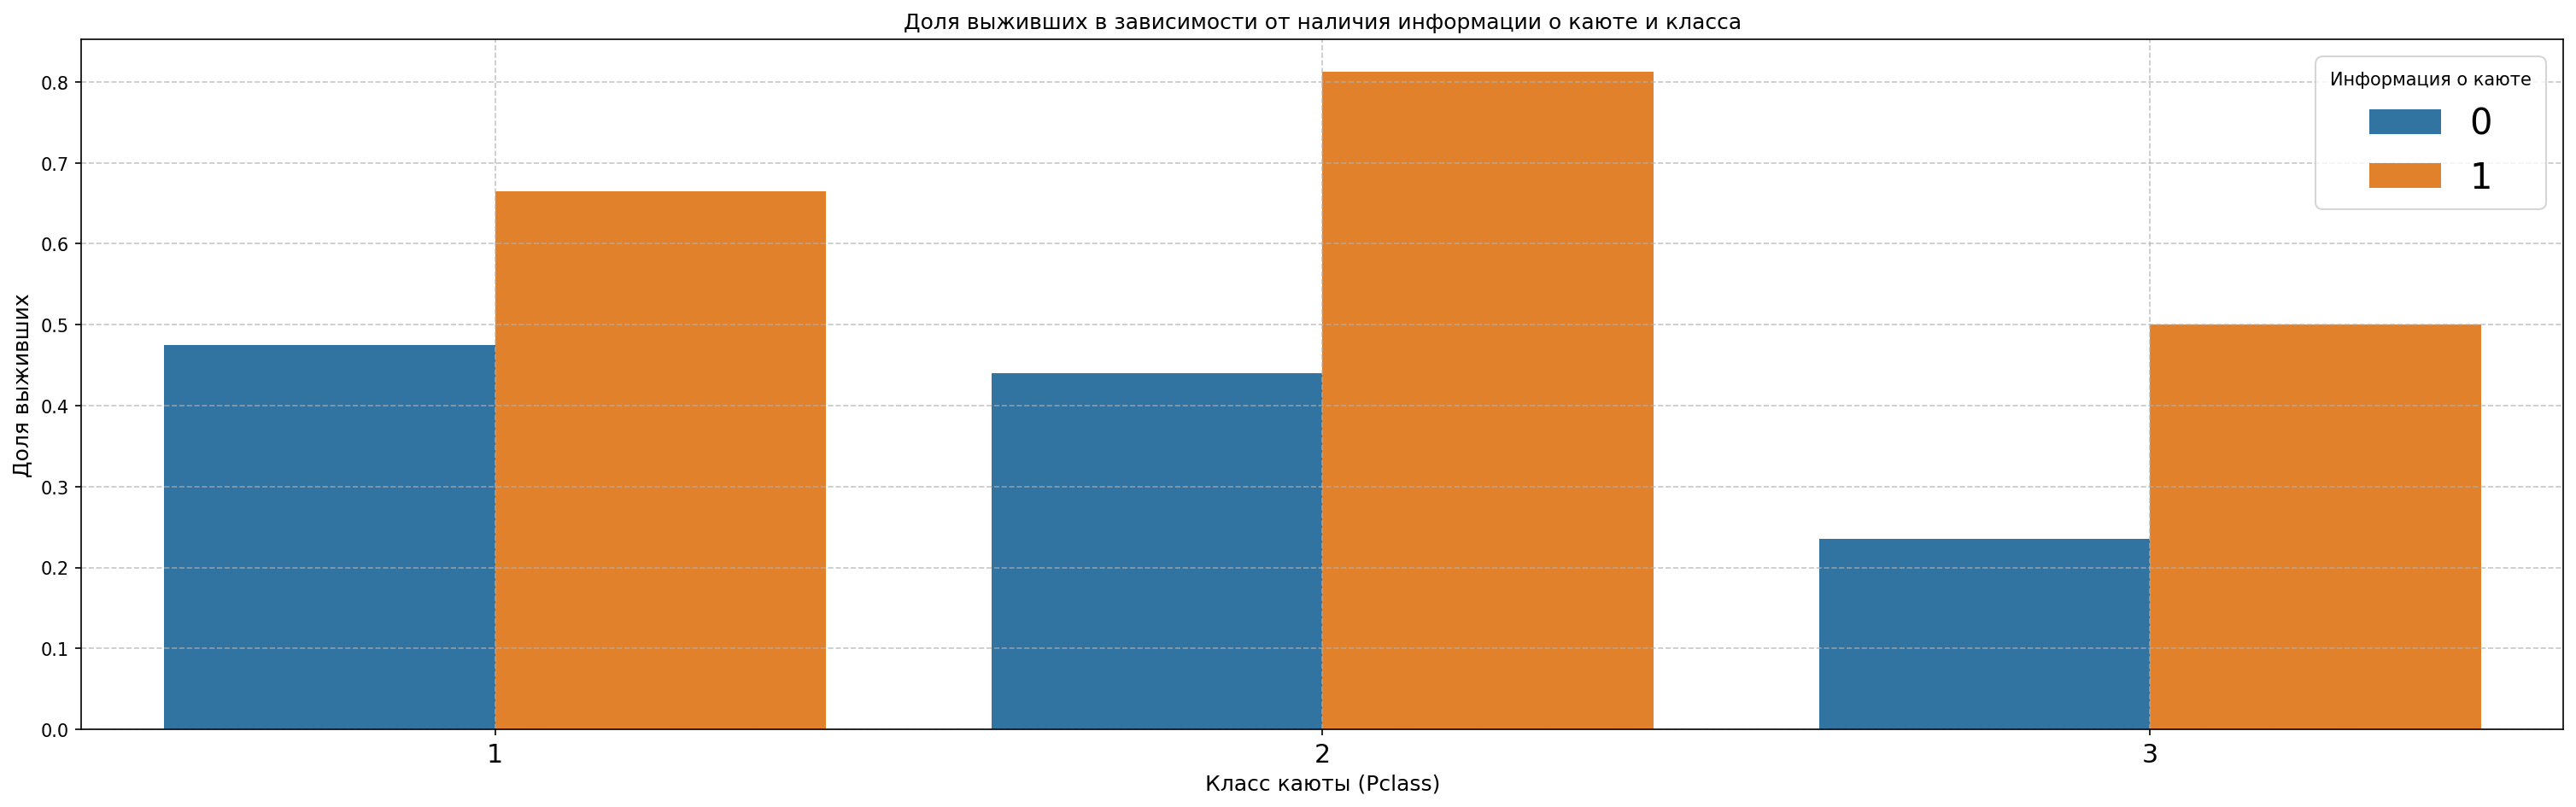

In [23]:
# Создаем новый столбик в Датасете с информацией о наличии кабины.
data['HasCabin'] = data['Cabin'].notnull().astype(int)

survival_rate = data.groupby(['Pclass','HasCabin'])['Survived'].mean().reset_index()

# Визуализация
bar = sns.barplot(x='Pclass',
                  y='Survived',
                  hue='HasCabin',
                  data=survival_rate)
plt.title('Доля выживших в зависимости от наличия информации о каюте и класса')
plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Доля выживших')
plt.legend(title='Информация о каюте')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Можем легко заметить тенденцию, что среди пассажиров, чьи каюты известны, сильно выше доля выжившых в каждом классе.

Так-же стоит упомянуть тот факт, что было найдено тело погибшего стюарта Герберта Кейва, при котором был список всех кают для пассажиров первого класса. Отсюда мы понимаем, что узнать информацию о каютах 2-го и 3-го класса было сильно тяжелее, если только они не выжили. Здесь и появляется такая разница между наличием информации о каюте и ее отсутствием, ведь если для пассажиров 2-го и 3-го класса известны их каюты, то шанс, что они выжили становится сильно выше.

###**Порт отправки, Стоимость и Номер билета**

Последние три пункта я решил совместить. Очевидно, что номер билет не будет нести никакой новой инфомарции, его можно будет в будущем убрать.

Порт отправки будет коррелировать со стоимостью, а сама стоимость билета в свою очередь влияет на класс пассажира.  

<Axes: >

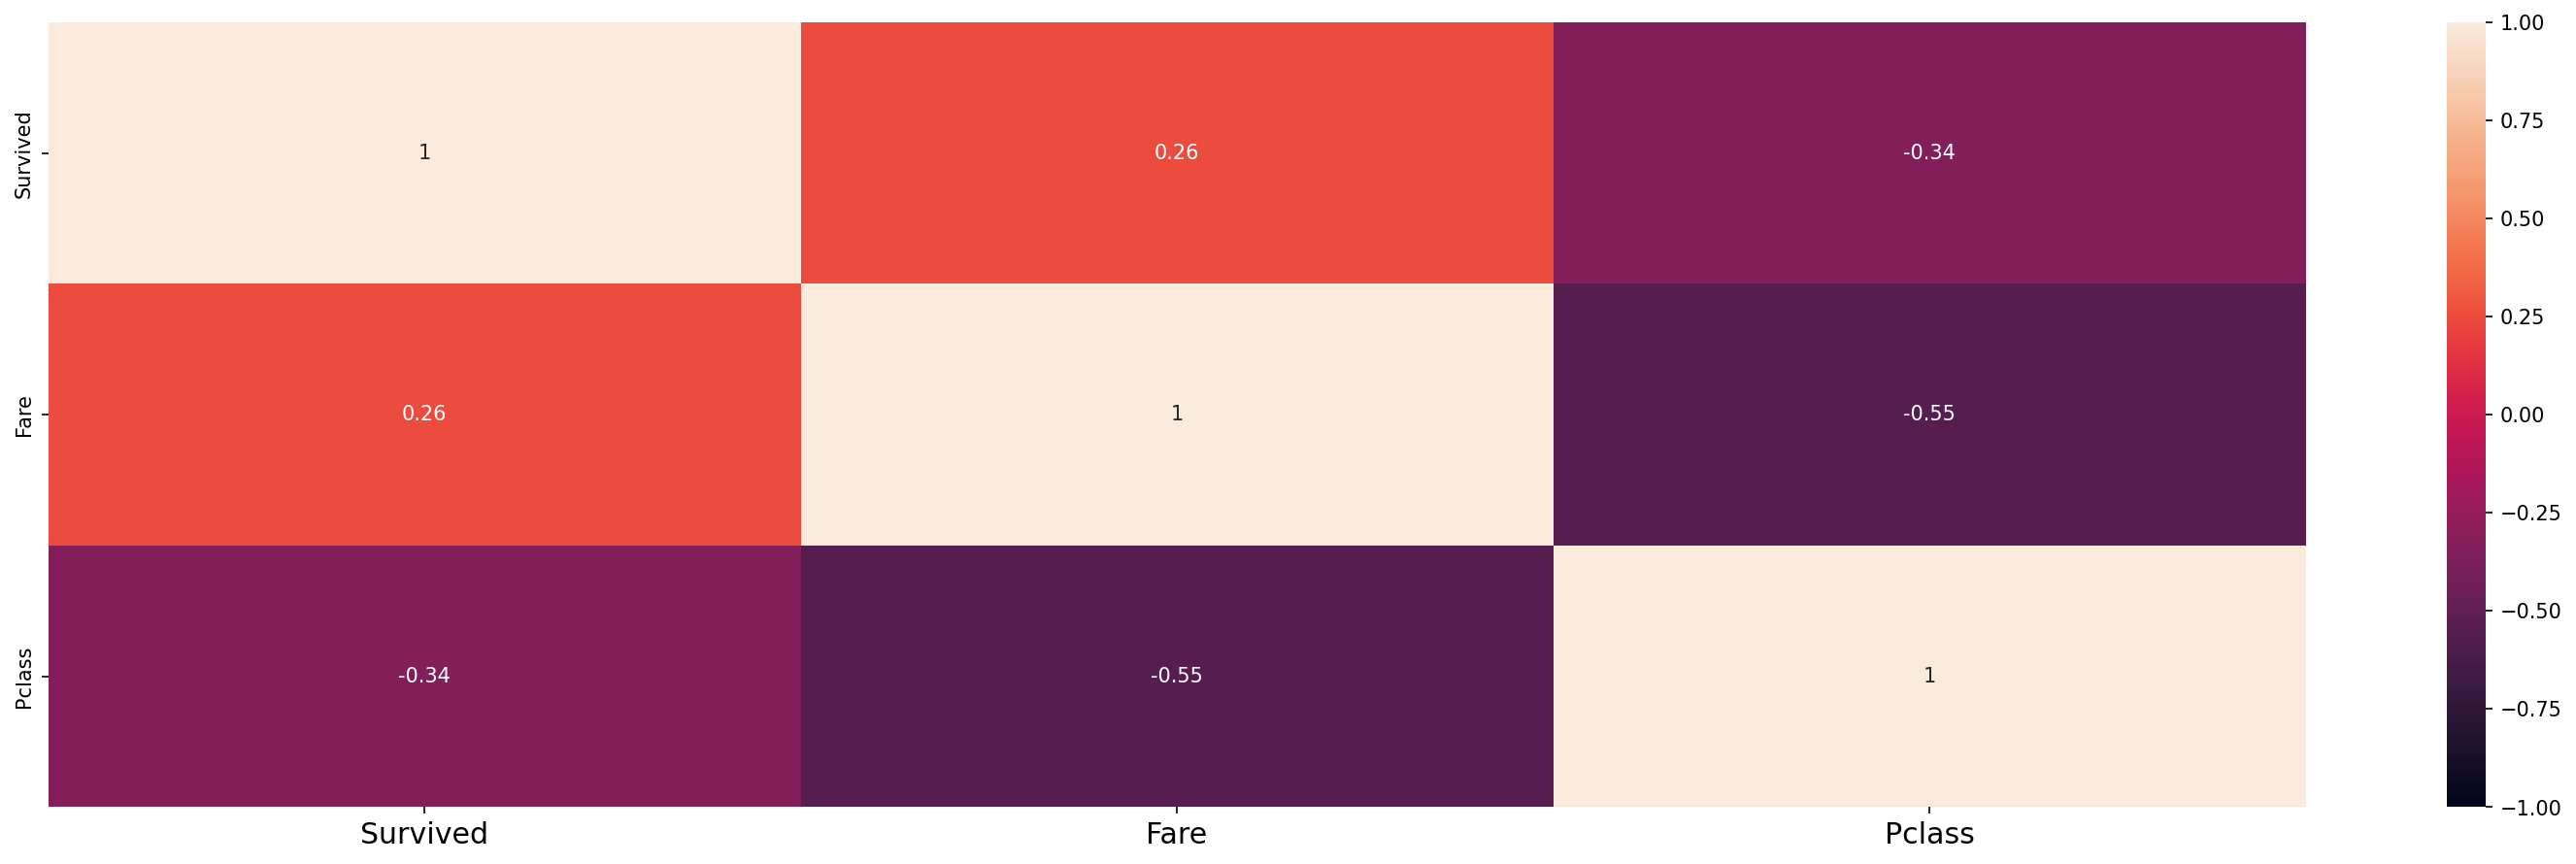

In [24]:
sns.heatmap(data[['Survived', 'Fare', 'Pclass']].corr(),
            annot=True,
            vmin=-1,
            vmax=1)

Как и ожидалось, видим сильную корреляцию между стоимостью билета, классом и выживаемостью пассажира


In [25]:
zero_fare_passengers = data[data['Fare'] == 0]

# Вывод результата
zero_fare_passengers.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Class,Family,is_alone,HasCabin
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,Третий класс,0,1,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,Первый класс,0,1,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,Третий класс,0,1,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S,Mr,Второй класс,0,1,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,Третий класс,0,1,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,NaN,S,Mr,Второй класс,0,1,0
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,NaN,S,Mr,Второй класс,0,1,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,NaN,S,Mr,Второй класс,0,1,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,Третий класс,0,1,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,30.0,0,0,112052,0.0,NaN,S,Mr,Первый класс,0,1,0


Мы можем увидеть из таблицы выше (в которой приведены все пассажиры без стоимости билетов), что 15 пассажиров обладает нулевой стоимостью билета. Неизвестно из-за чего такое могло случится, либо утеренная информация, либо билеты и вправду достались бесплатно (может быть персонал), но мы все равно заменим все значения на медианные в соответствии с классом пассажиров.

In [26]:
median_fares = data.groupby('Pclass')['Fare'].median()
def replace_zero_fare(row):
    if row['Fare'] == 0:
        return median_fares[row['Pclass']]
    else:
        return row['Fare']

data['Fare'] = data.apply(replace_zero_fare, axis=1)

zero_fares_count = (data['Fare'] == 0).sum()
print(f"Количество пассажиров с нулевой стоимостью билета после замены: {zero_fares_count}")

Количество пассажиров с нулевой стоимостью билета после замены: 0


Готово! С анализом и выбором признаков покончено.

###**Формирование признаков**

Итог главы с анализом и выбором признаков - это формирование, подготовка самих признаков для дальнейшего обучения модели.

Сейчас Датасет **test.csv** выглядит таким образом:

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Class,Family,is_alone,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Третий класс,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Первый класс,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Третий класс,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Первый класс,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Третий класс,0,1,0


Признаки, которые мы выделили:  Pclass, Sex, Age, Fare, Embarked, Title, Family, Is_Alone, HasCabin.

Формирование признаков будет происходить сразу для обоих файлов **test.csv** и **train.csv**.

In [28]:
# Словарь для синонимичных титулов
titles = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Dr": "Mr",
    "Rev": "Mr",
    "Mlle": "Miss",
    "Mme": "Mrs",
    "Ms": "Miss",
    "Major": "Mr",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "Col": "Mr",
    "Capt": "Mr",
    "Don": "Mr",
    "Sir": "Mr",
    "Jonkheer": "Mr",
    "Dona": "Mrs"
}

# Обрабатываем оба файла: train.csv и test.csv
for file in ('train', 'test'):
    # Загрузка данных
    data = pd.read_csv(f'{file}.csv')

    # Преобразуем пол из строковых значений в числовые:
    data = data.replace({'female' : 1, 'male': 0})

    # Находим медианную стоимость билета по каждому классу
    median_fares = data.groupby('Pclass')['Fare'].median()
    def replace_zero_fare(row):
        if row['Fare'] == 0:
            return median_fares[row['Pclass']]
        else:
            return row['Fare']

    data['Fare'] = data.apply(replace_zero_fare, axis=1)

    # Извлекаем титул из имени, используя регулярное выражение
    data['Title'] = data['Name'].str.extract(r',\s*([A-Za-z]+)\.',
                                             expand=False)
    # Группируем титулы в новую колонку
    data['Title'] = data['Title'].map(titles)

    # Создаем новый признак Family — количество членов семьи на борту
    data['Family'] = data['Parch'] + data['SibSp']

    # Приводим к бинарному виду столбцы Is_Alone и HasCabin
    data['Is_Alone'] = data['Family'] == 0
    data['HasCabin'] = pd.notna(data.Cabin)

    # Заполняем пропущенный возраст по титулу пассажира
    title_age_median = data.groupby('Title')['Age'].median()
    def fill_age(line):
        if pd.isna(line['Age']):
            return title_age_median[line['Title']]
        else:
            return line['Age']
    data['Age'] = data.apply(fill_age, axis=1)

    # Заполняем пропущенные значения порта отправки
    for i, emb in enumerate(data['Embarked']):
        if pd.isna(emb): data['Embarked'][i] = 'S'

    # Добавляем новые столбцы Embarked_S,... Для бинаризации столбцов
    data = data.join(pd.get_dummies(data.Embarked, prefix='Embarked'))
    # Тоже самое для Title: Добавляем Title_Mr, Title_Mrs...
    data = data.join(pd.get_dummies(data.Title, prefix='Title'))

    # Удаляем исходные лишние столбцы
    data = data.drop(columns=['Ticket',
                              'Name',
                              'SibSp',
                              'Parch',
                              'Cabin',
                              'Title',
                              'Embarked'])

    try:
        data.insert(data.shape[1] - 1, 'Survived', data.pop('Survived'))
    except KeyError:
        ...


    # Преобразуем Bool в цифровой вид
    data = data.replace({True: 1, False: 0})
    # Сохраняем новые датасеты
    data.to_csv(f'new_{file}.csv', index=False)

Оба файла были отчищены от лишней информации. Для примера, **train.csv** -> **new_train.csv** теперь выглядит так:

In [29]:
new_train_data = pd.read_csv('new_train.csv')

new_train_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Family,Is_Alone,HasCabin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Survived
0,1,3,0,22.0,7.2500,1,0,0,0,0,1,0,0,1,0,0
1,2,1,1,38.0,71.2833,1,0,1,1,0,0,0,0,0,1,1
2,3,3,1,26.0,7.9250,0,1,0,0,0,1,0,1,0,0,1
3,4,1,1,35.0,53.1000,1,0,1,0,0,1,0,0,0,1,1
4,5,3,0,35.0,8.0500,0,1,0,0,0,1,0,0,1,0,0


Таблица корреляции для всех отобранных признаков:

<Axes: >

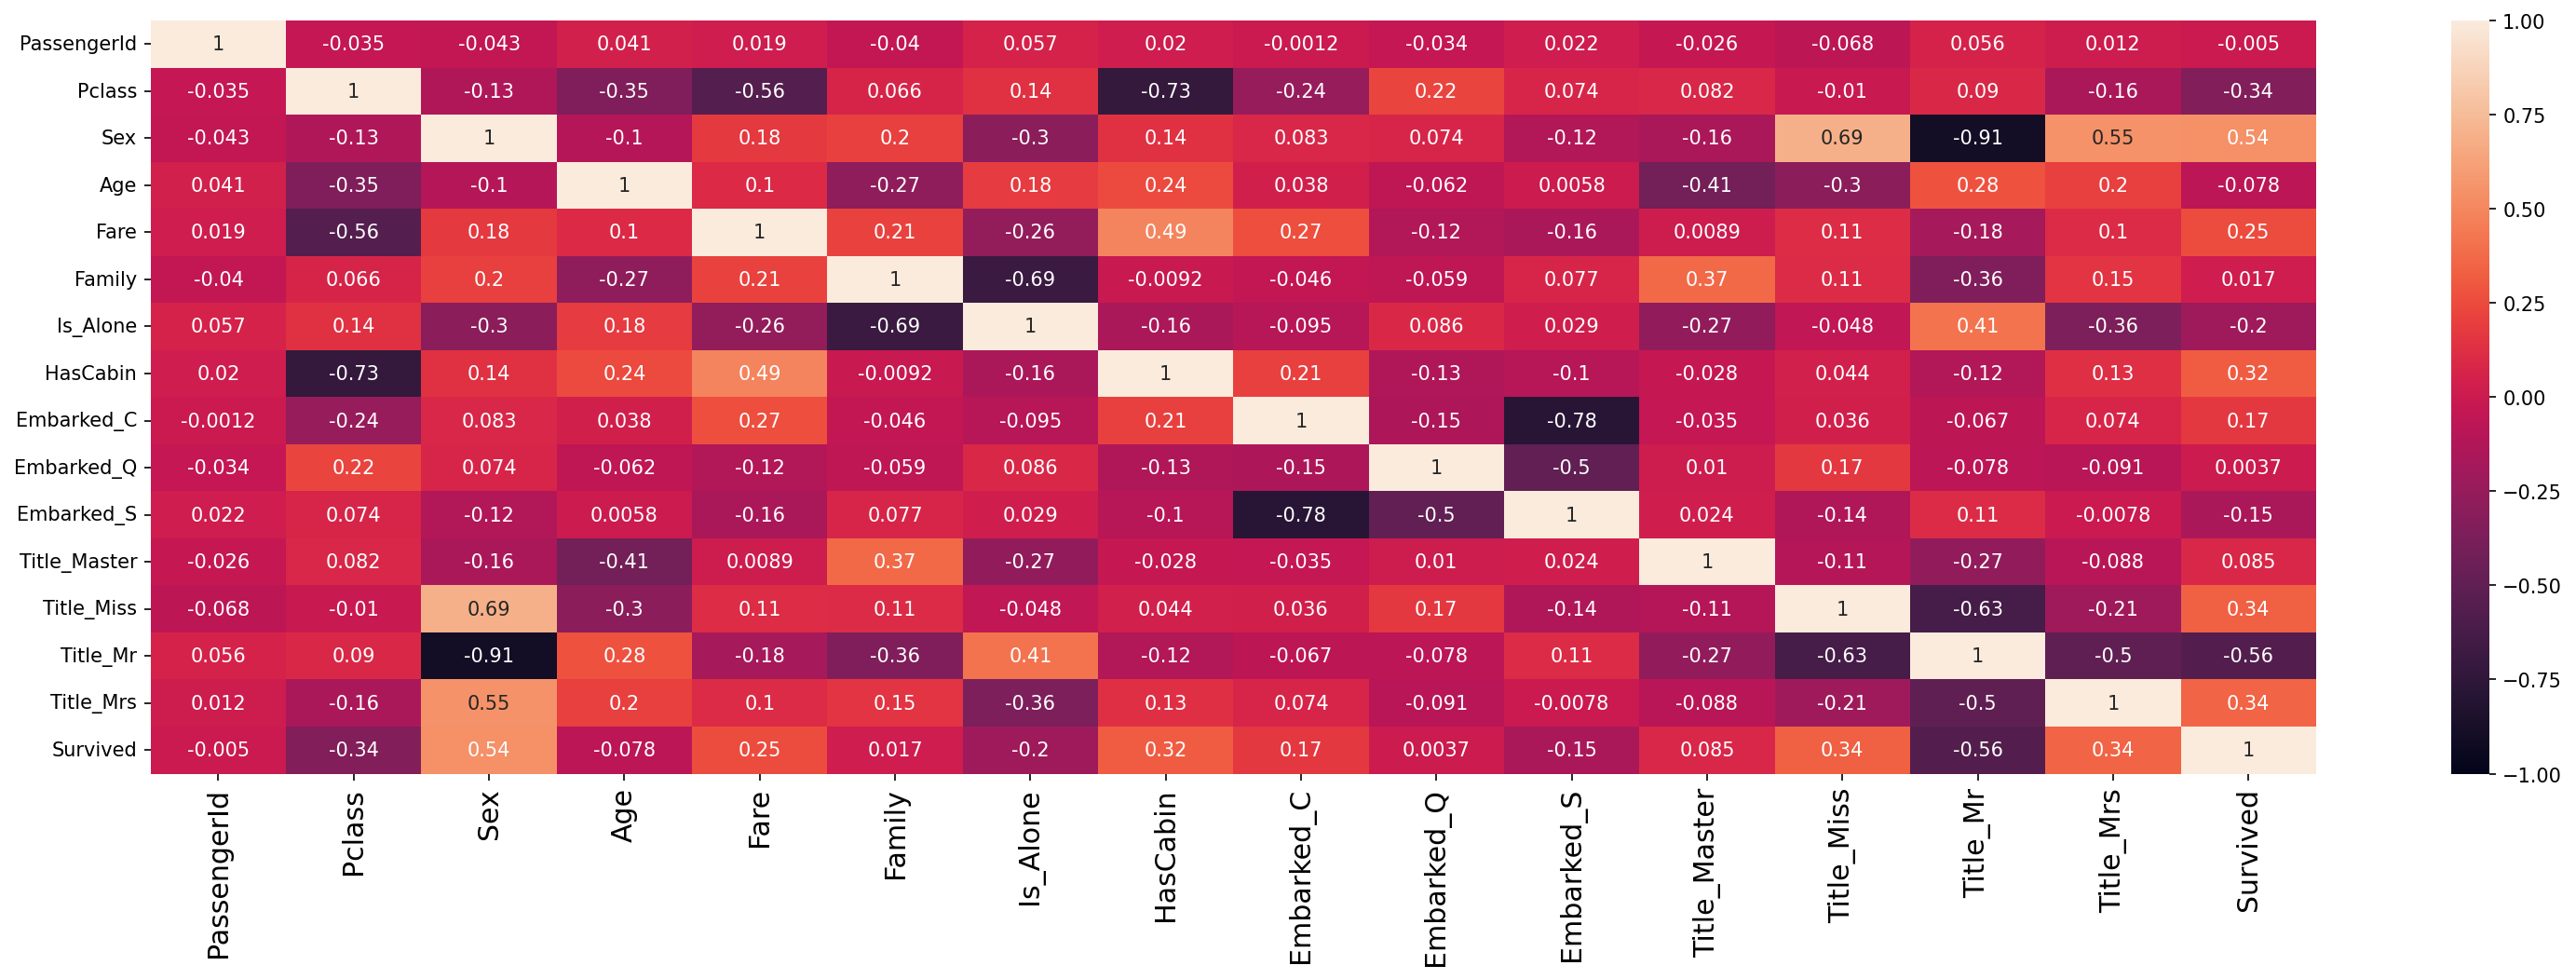

In [30]:
fig, ax = plt.subplots()
sns.heatmap(new_train_data.corr(), annot=True, vmin=-1, vmax=1, ax=ax)

Теперь можно полностью переходить к обучению модели!

##**Обучение модели**

В данном пункте будут рассмотрены два варианта обучения нейронной сети:


1.   Самостоятельная реализация Нейронной сети с помощью библиотеки PyTorch и последующее обучение вручную.  
2.   Применение уже готовых моделей обучения из библиотеки **sklearn**.

Обо всем подробнее ниже.



###**Реализация и обучение нейронной сети вручную**

План действий выглядит примерно таким образом:

1.   Подготовительная стадия
2.   Архитектура модели
3.   Обучение и Вывод результатов

Начнем.





####**Подготовительная стадия**

Данный этап состоит из создания классов для удобной работы с объектами, нормализацией данных и выборкой




---


Нормализация или стандартизация - это преобразование признаков к единому масштабу.
>Нормализация будет нужна по нескольким причинам.
>>1. К примеру, если Pclass изменяется от 1 до 3, а Fare от 0 до 80 (условно), то модель ошибочно может выдать признаку Fare больший вес.
>>
>>2. При одинаковом масштабе данных, модель будет обучаться быстрее



---

Валидационная выборка нужна для контроля качества обучения на "невидимых данных", т.е на данных, которых небыло при обучении для избежания переобучения (запоминания данных моделью).



---



In [31]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import os

In [32]:
# Если доступна видеокарта, то для ускоренного обучения используем ее
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Функция **get_loaders()** нужна для разделения данных на обучающие и валидационные выборки

Реализуем класс для загрузки и обработки в модель данных. В самом классе реализовывается метод с нормализацией данных.

In [33]:
def get_loaders(batch_size: int, dataset: Dataset, validation_split: float = 0.2) -> tuple:

    # batch_size - количество примеров, обрабатываемых моделью за одну итерацию
    # dataset - текущий датасет
    # validation_split - 20% данных уходит на валидацию

    # val_size - количество валидационных данных
    val_size = int(validation_split * len(dataset))

    # train_size - количество тренеровочных данных
    train_size = len(dataset) - val_size

    # Случайно распределение исходного датасета на два соразмерно количеству данных
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # DataLoader - класс в PyTorch, группирующий датасеты на батчи (Пакеты данных) для передачи модели
    train_data = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_data = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

    return train_data, val_data


class TitanicDataset(Dataset):
    def __init__(self, test=False, normalize=False, mean=None, std=None):

        self.test = test # Если 1, обрабатываем тестовые данные, иначе обучающие
        self.normalize = normalize # Если 1, то нормализуем признаки
        self.mean = mean
        self.std = std

        # Загружаем нужный датасет
        if self.test:
            self.data = pd.read_csv('new_test.csv')

            # В Х сохраняем матрицу признаков без столбца PassengerId
            # Матрица признаков выглядит как:
            """ X = [
                [1, 2, 3, 4, ...]     Где 1 - Id первого пассажира, 2 - Класс первого пассажира
                [5, 6, 7, 8, ...]         5 - Id второго пассажира, 2 - Класс второго пассажира
                ...
                ]
            """
            # Числа для примера выбраны совершенно случайно.
            self.X = self.data.loc[:, :'Title_Mrs'].drop(columns='PassengerId').values
        else:
            self.data = pd.read_csv('new_train.csv')
            self.X = self.data.loc[:, :'Title_Mrs'].drop(columns='PassengerId').values

            # В y записывается список из 1 и 0 (Выжил/Погиб) для каждого пассажира
            self.y = self.data['Survived'].values

            # y является целевой переменной (учителем) в обучении


        # Нормализация только для обучающих данных
        if self.normalize:
            if not self.test:
                self.X, _, self.mean, self.std = self.normalize_data(self.X)
            else:
                self.X, _, _, _ = self.normalize_data(self.X, mean=self.mean, std=self.std)

    # Возвраащает количество примеров в батче
    def __len__(self):
        return self.X.shape[0]

    # Преобразуем строку из матрицы Х в тензор
    def __getitem__(self, idx):
        X = torch.from_numpy(self.X[idx]).float()
        if self.test:
            return X
        else:
            y = torch.tensor(self.y[idx], dtype=torch.long)
            # Если используются обучающие данные, то возвращаем пару
            return X, y


    @staticmethod
    def normalize_data(train_data: np.ndarray, test_data: np.ndarray = None, mean=None, std=None) -> tuple:
        # train_data - Обучающие данные
        # test_data - Тестовые данные
        # Возвращаем кортеж tuple с нормализованными обучающими и тестовыми данными, mean и std

        # mean - среднее значение по каждому признаку
        # std - стандартное отклонение по каждому признаку

        if mean is None or std is None:
            mean = np.mean(train_data, axis=0)
            std = np.std(train_data, axis=0)

        # train_norm и test_norm - итоговые, нормализованные датасеты
        train_norm = (train_data - mean) / std
        test_norm = None

        if test_data is not None:
            test_norm = (test_data - mean) / std

        return train_norm, test_norm, mean, std


$$
\text{Формула для нормализации данных: } x_{\text{norm}} = \frac{x - \mu}{\sigma}
$$

####**Архитектура модели**

В данном блоке будет создана структура нейронной сети: класс, который содержит все "внутренности", т.е параметры модели.

Схема архитектуры нейронной сети FCNN (Fully Connected Neural Network) выглядит таким образом:*Курсив*

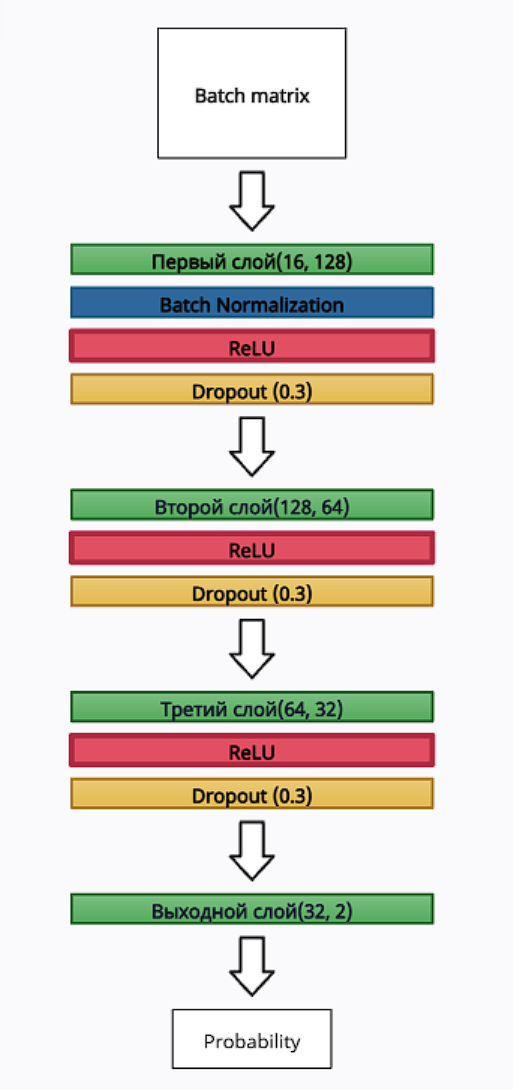

Пояснения. Схема состоит из нескольких основных компонентов, каждый из которых вкратце рассмотрим


---


>На вход поступает матрица из признаков **Batch Matrix**
>  
>В контексте Машинного Обучения Batch - это набор строк, обрабатываемых нейронной сетью за одну итерацию. Батч помогает "балансировать" между скоростью обучения модели и ее точностью.
>
>Если говорить на примерах, то:
> 1. Если значение Batch_size будет 1, то сеть будет обрабатывать по одному пассажиру за одну итерацию. Веса обновляются каждую итерацию и в таком случае, обучение займет сильно больше времени
> 2. Если значение Batch_size будет 16, то скорость обучения будет быстрее (всего 50 итераций по 16 для ~800 примеров вместо 800 итераций по 1)
>
> 3. Если значение Batch_size будет 128, то, скорее всего, будет возникать переобучаемость в связи со слишком малым количеством итераций!
>
>Для нашей задачи 14 - вполне допустимый вариант для Batch_size



---




>Следующим идет первый слой линейных преобразований нейронов из 14 в 128
>
$$
\text{Формула для преобразования: } Y = X*W^T+B
$$
>Где:
>
> X - Входной тензор размером (14, 14)
>
> Y - Выходной тензор размером (14,128)
>
> W - Матрица весов размером (128, 14) (транспонированная)
>
> B - Вектор смещения для каждого нейрона (128, 128, ...)
>
> Матрица весов заполняется при помощи метода Xavier Initialization, если вам интересно почитать в подробности про то, как заполняются веса в матрицах, то прикладываю ссылку: [Читать про Xavier Initialization](https://365datascience.com/tutorials/machine-learning-tutorials/what-is-xavier-initialization/)
>
> Обобщая все линейные слои стоит сказать зачем они вообще нужны. **Линейный слой** - это один из важнейших компнонентов самой нейронной сети. Именно на этих этапах модель пытается увидеть закономерности (К примеру: что комбинация **Возраст + Пол + Класс** может быть сильным предиктором выживания)


---

>   После линейного преобразования идет **Batch Normalization** - ключ к ускорениию, увеличению производительности и для стабильности обучения нейронной сети.
>
> Если говорить вкратце, то BN решает проблему "внутреннего ковариационного сдвига". Изучение этой темы ляжет в основу целой статьи :). Нормализация делает сеть менее чувствительной к масштабу входных данных и улучшает общую стабильность процесса обучения.
>
> И опять, если вы хотите ознакомиться, то советую [Данную статью](https://habr.com/ru/companies/mvideo/articles/782360/). В конце текущей статьи также будут ссылки и на другие статьи, на основе которых писалась данная.


---

>Следом идет функция активации, в данном случае **ReLU** (Rectified Linear Unit). Данная функция используется для того, чтоб модель попыталась найти неочевидные связи, т.е. функция ReLU добавляет нелинейности в обучение нейронной сети.

>Почему среди различных функций активации (Sigmoid, Tanh, ReLU, Softmax) в нашей задаче стоит использовать именно ReLU? Все исходит из того, что наша задача не требует глубоких и сложных вычислений, функция активации ReLU является совокупностью простоты (в плане вычислений) и эффективностью в небольших масштабах.


---

>**Dropout** предполагает исключение заданного в процентах количества электронов для избежания переобучения (Чтоб модель не зацикливалась на определенных нейронах). Прочитать подробнее можно в последней приложенной ссылке (в пункте с Batch Normalizaion).

---

>На следующих вторых и третьих слоях происходит сокращение нейронов и применение к ним ReLU и Dropout. В выходном слое содержится два нейтрона: вероятности пассажир Выжил и пассажир Погиб.
>
> В конце хочется сказать, что комбинация нейронов 14 -> 128 -> 64 -> 32 -> 2 выбрана для баланса между достаточно сложных для выявления комбинаций признаков и недостаточно сложных для переобучения.

Код реализации архитектуры нейронной сети с помощью PyTorch:

In [34]:
import torch.nn as nn
import torch.nn.init as init

# Класс nn.Module - Базовый класс для всех нейросетевых модулей в Pytorch
# Класс Net наследуется от него
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()

        # Создается модель на основе последовательности слоев
        self.model = nn.Sequential(
            # Входной слой: Linear → BatchNorm → ReLU → Dropout
            nn.Linear(14, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.1),

            # Скрытый слой 1: Linear → ReLU → Dropout
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),

            # Скрытый слой 2: Linear → ReLU → Dropout
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.1),

            # Выходной слой: Linear
            nn.Linear(32, 2)
        )

        # Вызов метода инициализации весов
        self._initialize_weights()

    # forward() описывает последовательность операций и слоев через
    # которые нужно пройти входным данным для получения выходной сети
    def forward(self, x):
        return self.model(x)

    # Инициализация весов
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # Инициализация весов по методу Xavier/Glorot
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    # Инициализация смещения нулями
                    init.constant_(m.bias, 0)


####**Обучение модели и Вывод результатов**

Финальный пункт раздела с самостоятельной реализацией модели. План выглядит таким образом:

>1. Создание модели
>2. Установка параметров обучения
>3. Загрузка данных
>4. Оптимизация
>5. Цикл обучения
>6. Предсказание на тестовых данных
>7. Вывод результатов

In [35]:
import torch

# Функция считает точость модели
def compute_binary_accuracy(model, loader):
    # Переводим модель в режим оценки, отключаем Dropout
    model.eval()
    # Общее количество примеров
    total_samples = 0
    # Общее количество правильных примеров
    true_samples = 0

    # Отлючение вычисления градиентов для того, чтоб ускорить вычисления
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            # Ищем максимальное значение вывода сети
            prediction = torch.argmax(model(x), dim=1)
            # Сравниваем предсказания с истинными метками
            true_samples += (prediction == y).sum().item()
            # Увеличиваем счетчик
            total_samples += y.shape[0]
    # Возвращаем точность как долю правильных предсказаний от общего числа
    return true_samples / total_samples


# Функция вычисляет значение функции потерь на валидационной выборке.
def validation_loss(model, loader, loss_fn):
    # Модель переводится в режим оценки
    model.eval()
    # Аккумулятор для суммы потерь по всем батчам.
    loss_accum = 0.0

    # Отключены вычисления градиентов.
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            # Прямой проход: получаем предсказания модели
            prediction = model(x)
            # Считаем значение функции потерь на этом батче
            loss_value = loss_fn(prediction, y)
            # Добавляем значение потерь к аккумулятору.
            loss_accum += loss_value.item()
    # Возвращаем среднее значение функции потерь по всем батчам
    return loss_accum / len(loader)

In [36]:
!ls

new_test.csv  new_train.csv  sample_data  test.csv  train.csv


In [37]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader
from tqdm import tqdm
import importlib


# Выбор устройства: CPU или GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Создание модели
model = Net1()
model.to(device)

# Гиперпараметры
num_epochs = 2000
batch_size = 64
learning_rate = 0.01
weight_decay = 0.01
validation_split = 0.3

# Загрузка данных
data_train = TitanicDataset(normalize=True)
mean, std = data_train.mean, data_train.std

train_loader, val_loader = get_loaders(
    batch_size=batch_size,
    dataset=data_train,
    validation_split=validation_split
)


# Функция потерь и оптимизатор
loss = nn.CrossEntropyLoss()
loss.to(device)
optimizer = optim.Adam(model.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)


# LR Annealing
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                 mode='min',
                                                 factor=0.6,
                                                 patience=50)

# Истории метрик
loss_history = []
val_loss_history = []
train_history = []
val_history = []
lr_history = []

# Обучение
for epoch in tqdm(range(num_epochs)):
    model.train()

    loss_accum = 0
    correct_samples = 0
    total_samples = 0

    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)

        prediction = model(x)
        loss_value = loss(prediction, y)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        _, indices = torch.max(prediction, dim=1)
        correct_samples += torch.sum(indices == y)
        total_samples += y.shape[0]

        loss_accum += loss_value.item()

    # Средние значения за эпоху
    ave_loss = loss_accum / len(train_loader)
    train_accuracy = float(correct_samples) / total_samples

    # Валидация
    with torch.no_grad():
        val_accuracy = compute_binary_accuracy(model, val_loader)
        val_loss = validation_loss(model, val_loader, loss)

    # Сохраняем историю метрик
    loss_history.append(ave_loss)
    train_history.append(train_accuracy)
    val_history.append(val_accuracy)
    val_loss_history.append(val_loss)
    lr_history.append(optimizer.param_groups[0]['lr'])

    scheduler.step(val_loss)

print("Average loss: %f, Train accuracy: %f, Val accuracy: %f" % (ave_loss, train_accuracy, val_accuracy))

# Предсказание на тестовых данных
test_set = TitanicDataset(test=True, normalize=True, mean=mean, std=std)
test_loader = DataLoader(test_set, batch_size=1)

model.eval()
labels = {}

with torch.no_grad():
    for i_step, x in enumerate(test_loader):
        x = x.to(device)
        prediction = model(x)
        probabilities = torch.softmax(prediction, dim=1)
        _, predicted = torch.max(probabilities, dim=1)
        labels[i_step + 892] = int(predicted)

# Сохранение результата
output = pd.DataFrame(list(labels.items()), columns=['PassengerId', 'Survived'])
output_path = os.path.join('outputs', f'output_result_predict.csv')
os.makedirs(os.path.dirname(output_path), exist_ok=True)
output.to_csv(output_path, index=False)

100%|██████████| 2000/2000 [04:03<00:00,  8.21it/s]


Average loss: 0.352189, Train accuracy: 0.855769, Val accuracy: 0.816479


Сейчас будут описаны ключевые этапы обучения. Начнем.

1. **Создаем модель на основе созданной структуры и следом переносим ее на GPU**.

```
model = Net1()
model.to(device)
```

2. **Задаем гиперпараметры**.

```
num_epochs = 1000
batch_size = 32
learning_rate = 0.001
weight_decay = 0.01
validation_split = 0.1
```
Гиперпараметры - оптимальные условия для обучения модели. Благодаря ним мы можем контроллировать качество обучения, эксперементально подбирая значения для самих параметров.

>num_epochs - сколько раз модель обойдет все данные (эпохи)
>
>batch_size - сколько пассажиров модель обработает за один шаг
>
>learning_rate - скорость обучения
>
>weight_decay - регулировка предотвращения переобучения
>
>validation_split - количество данных, отправленных на валидацию


3. **Загружаем датасеты**.

```
data_train = TitanicDataset(normalize=True)
train_loader, val_loader = get_loaders(
    batch_size=batch_size,
    dataset=data_train,
    validation_split=validation_split
)
```
TitanicDataSet - ранее созданный класс для загрузки и нормализации данных
get_loaders() функция делит данные на обучающие и валидационные.


4. **Функция оценки потерь и оптимизатор весов**.

```
loss = nn.CrossEntropyLoss()
loss.to(device)
optimizer = optim.Adam(model.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)
```
CrossEntropyLoss() функция сравнивает насколько предсказания отличаются от правильных ответов.

Adam() является оптимизатором для лучшего автоматического подбора весов в модели.

5. **Оптимизация скорости обучения**.

```
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                 mode='min',
                                                 factor=0.6,
                                                 patience=50)
```

scheduler автоматически снижает скорость обучения в том случае, когда качество на валидации перестает улучшаться.

6. **Инициализация метрик**.

```
loss_history = []
val_loss_history = []
train_history = []
val_history = []
lr_history = []
```
С помощью данных метрик мы сможем провести анализ обучения, а именно построить графики и с помощью них проводить расследования дальше. Об этом будет ниже!


7. **Цикл обучения по эпохам**.

```
for epoch in tqdm(range(num_epochs)):
    model.train()
    ...
```

8. **Внутренний цикл по батчам**.

```
for x, y in train_loader:
    x = x.to(device)
    y = y.to(device)

    prediction = model(x)
    loss_value = loss(prediction, y)

    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
```

>x, y — входные данные и правильные ответы.
>
>prediction = model(x) — модель делает предсказание.
>
>loss_value = loss(prediction, y) — считаем ошибку.
>
>optimizer.zero_grad() — обнуляем градиенты.
>
>loss_value.backward() — считаем градиенты (обратное распространение ошибки).
>
>optimizer.step() — обновляем веса модели.

Также считаем точность (accuracy) и накапливаем ошибку для всей эпохи.


9. **Валидация**.

```
with torch.no_grad():
    val_accuracy = compute_binary_accuracy(model, val_loader)
    val_loss = validation_loss(model, val_loader, loss)
```

torch.no_grad() — отключает вычисление градиентов (ускоряет и экономит память).

Считаем точность и ошибку на валидационной выборке.

10. **Сохраняем метрики текущей итерации**.

```
loss_history.append(ave_loss)
train_history.append(train_accuracy)
val_history.append(val_accuracy)
val_loss_history.append(val_loss)
lr_history.append(optimizer.param_groups[0]['lr'])
```

11. **Вывод результатов обучения**.

```
print("Average loss: %f,
      Train accuracy: %f,
      Val accuracy: %f" % (ave_loss, train_accuracy, val_accuracy))
```

12. **Предсказание на тестовых данных**.

```
test_set = TitanicDataset(test=True, normalize=True)
test_loader = DataLoader(test_set, batch_size=1)

model.eval()
labels = {}

with torch.no_grad():
    for i_step, x in enumerate(test_loader):
        x = x.to(device)
        prediction = model(x)
        probabilities = torch.softmax(prediction, dim=1)
        _, predicted = torch.max(probabilities, dim=1)
        labels[i_step + 892] = int(predicted)
```
Для каждого пассажира делаем предсказание

13. **Финал. Сохраняем результат**.

```
output = pd.DataFrame(list(labels.items()), columns=['PassengerId', 'Survived'])
output_path = os.path.join('outputs', f'output_result_predict.csv')
os.makedirs(os.path.dirname(output_path), exist_ok=True)
output.to_csv(output_path, index=False)
```
Выгружаем результат в формате .csv файла. Конец!

---


В ходе обучения данная модель достигла 36% средних потерь, 85% тренировочной точности и от 80% до 85% валидационной точности.


На Kaggle выходной .csv файл набрал 77% точности.


Напоминаю, что:

**Average loss** показывает насколько хорошо модель предсказывает правильные ответы на определенной выборке.
Loss (потеря) показыает, насколько сильно предсказание модели отличается от правильного ответа на каждой эпохе. Соответственно **Average loss** - среднее значение **loss** по всем эпохам.


**train accuracy** - доля правильных предсказаний модели на тех данных, на которых она обучалась

**validation accuracy** - доля правильных предсказаний на валидационных данных, т.е на тех обучающих данных, которые были скрыты от модели во время обучения.

validation_split = 0.1 (например) означает, что 10% от всех пассажиров в new_train.csv уйдет в валидационные данные, а остальные 90% будут участвовать в обучении.

---

Точности обучения можно проанализировать на графиках: рассмотрим тренировочную и валидационную точность.  

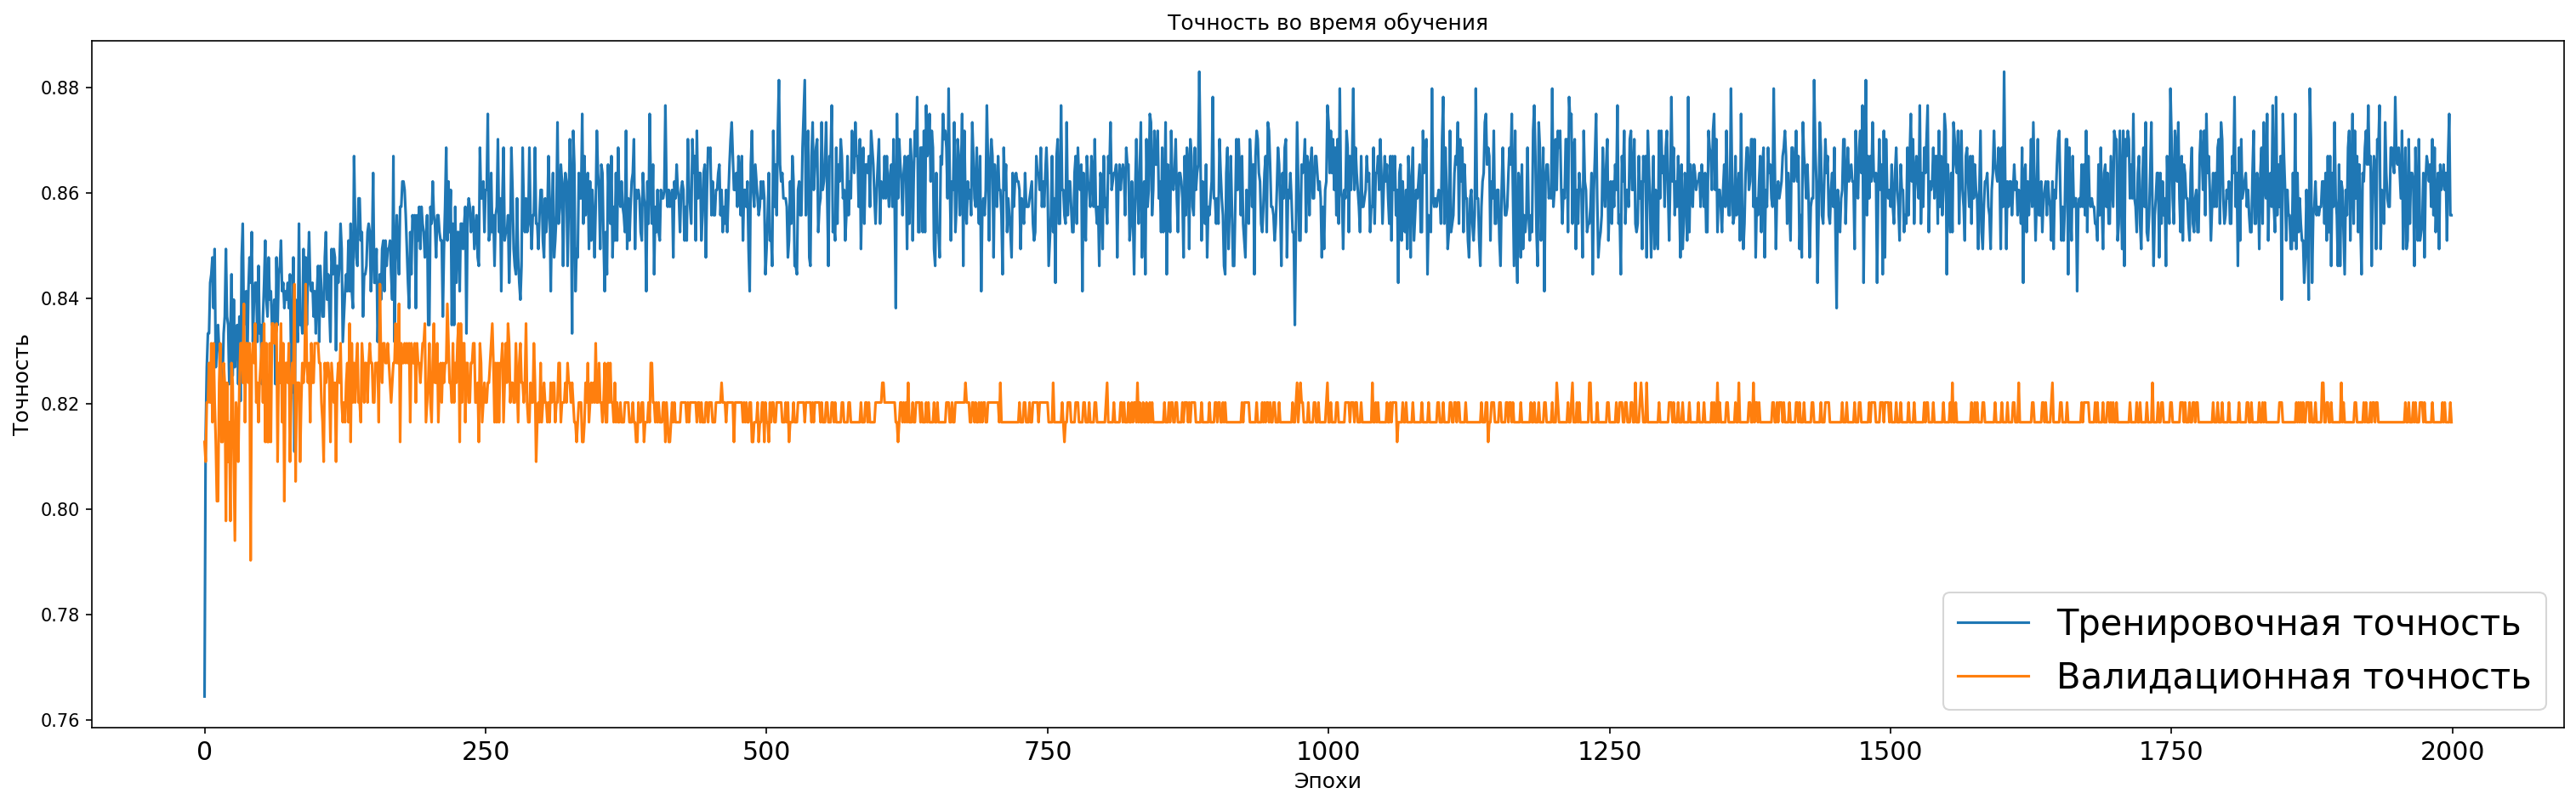

In [38]:
   plt.plot(train_history, label='Тренировочная точность')
   plt.plot(val_history, label='Валидационная точность')
   plt.xlabel('Эпохи')
   plt.ylabel('Точность')
   plt.legend()
   plt.title('Точность во время обучения')
   plt.show()

Train accuracy держится на уровне от 84% до 86%, Val accuracy лежит чуть ниже, в районе 81-84%. Разница между ними держится в районе 3%. Для нашей задачи данная точность является довольно высокой, откуда мы можем сделать вывод, что модель обучается хорошо.

>Если бы обе точности были ниже, например, 70%, то можно было бы задуматься о том, что модель недообучается (модель не улавливает закономерностей в признаках).
>
>Большая разница между валидационной и обучающей точностью говорит о том, что модель переобучается (модель просто заучила результаты и ей трудно сделать предсказание на новых данных)


###**Реализация обучения нейронной сети с помощью sklearn**

В данном, почти финальном модуле нейронная сеть будет обучаться на уже готовых моделях обучения, на таких, как:
>**Логистическая регрессия**
>
>**Логистическая регрессия с кросс-фалидацией**
>
>**RandomForest**
>
>**Градиентный буст**

Перед началом лучше ознакомиться с данными моделями обучения. Тут я приведу их краткое описание и ссылки на ознакомление получше.